<a href="https://colab.research.google.com/github/ivonerkov/Diplomska_191053/blob/master/Diplomska191053.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data_set = pd.read_csv("/content/drive/MyDrive/Netflix Userbase.csv")

In [ ]:
data_set.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


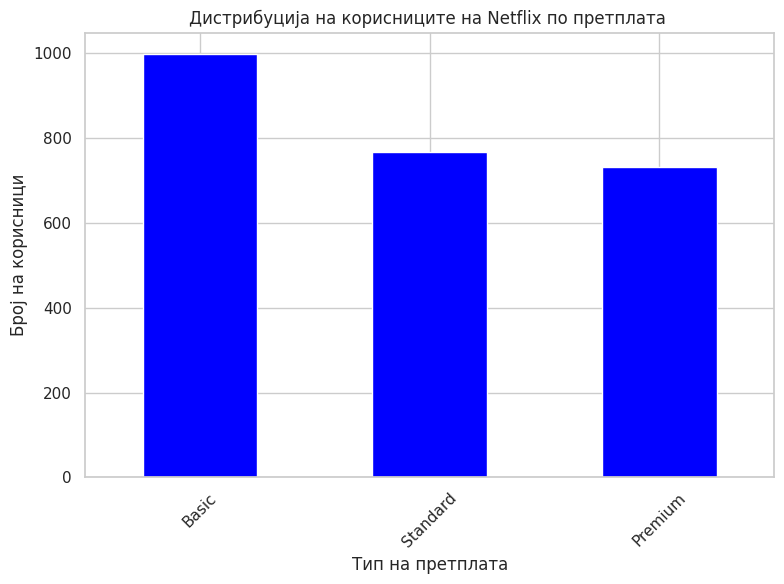

In [ ]:
user_counts = data_set['Subscription Type'].value_counts()

plt.figure(figsize=(8, 6))
user_counts.plot(kind='bar', color='blue')
plt.title('Дистрибуција на корисниците на Netflix по претплата ')
plt.xlabel('Тип на претплата')
plt.ylabel('Број на корисници')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

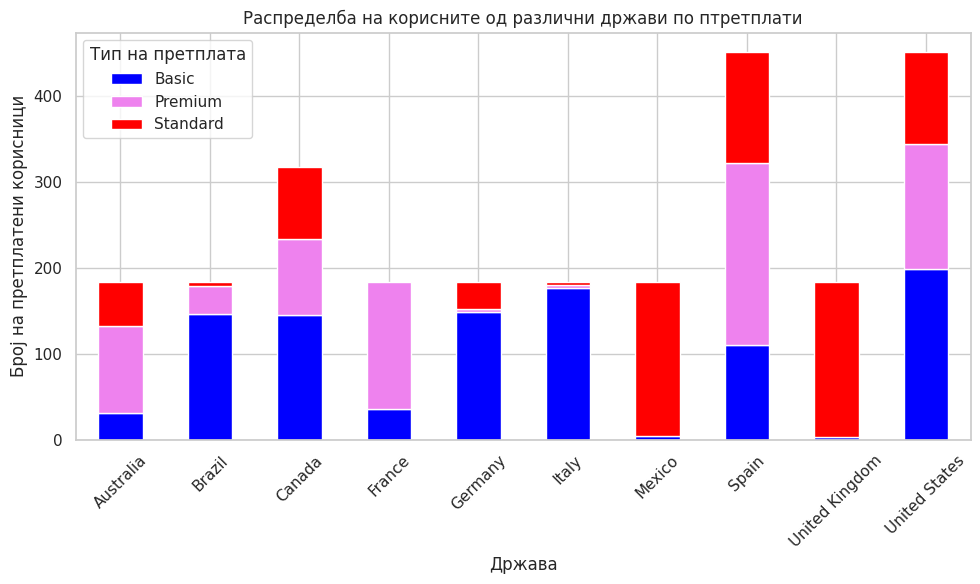

In [ ]:
subscription_counts = data_set.groupby(['Country', 'Subscription Type'])['User ID'].count().unstack()

custom_colors = ['blue', 'violet', 'red']
ax = subscription_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=custom_colors)
plt.title('Распределба на корисните од различни држави по птретплати')
plt.xlabel('Држава')
plt.ylabel('Број на претплатени корисници')
plt.xticks(rotation=45)
plt.legend(title='Тип на претплата')
plt.tight_layout()
plt.show()

In [ ]:
netflix_df = pd.read_csv("/content/drive/MyDrive/Netflix subscription fee Dec-2021.csv")

In [ ]:
netflix_df.head()

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26
1,au,Australia,6114,4050,2064,7.84,12.12,16.39
2,at,Austria,5640,3779,1861,9.03,14.67,20.32
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99


In [ ]:
#Проверуваме дали постојат missing values
netflix_df.isna().any().any()

False

In [ ]:
!pip install pycountry_convert
import pycountry_convert as pc

#Функција која ќе препознае на кој континет е секоја земја по нејзиниот код
def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

#Создаваме колона која ке покажува за секоја земја од кој континент е
netflix_df['Region'] = netflix_df['Country'].apply(lambda country_name: country_to_continent(country_name))

In [ ]:
subcription_stats = netflix_df['Cost Per Month - Basic ($)'].describe().round(2).to_frame()
standard = netflix_df['Cost Per Month - Standard ($)'].describe().round(2)
premium = netflix_df['Cost Per Month - Premium ($)'].describe().round(2)
subcription_stats = pd.concat([subcription_stats, standard, premium], axis=1)
subcription_stats

,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
count,65.00,65.00,65.00
mean,8.37,11.99,15.61
std,1.94,2.86,4.04
min,1.97,3.00,4.02
25%,7.99,10.71,13.54
50%,8.99,11.49,14.45
75%,9.03,13.54,18.06
max,12.88,20.46,26.96


Просечната цена по различните претплати на Netflix се:
<br>
<ul> Basic: 8.37 <br>
Standard: 11.99 <br>
Premium: 15.61 <br> <ul>

In [ ]:
netflix_subscription_stats_df = pd.DataFrame(columns = ['Description', 'Country', 'Total Library Size', 'No. of TV Shows', 'No. of Movies','Cost Per Month - Basic ($)', 'Cost Per Month - Standard ($)','Cost Per Month - Premium ($)'])

#Највисока цена по месец за Basic претплатата
max_basic = netflix_df[netflix_df['Cost Per Month - Basic ($)'] == netflix_df['Cost Per Month - Basic ($)'].max()]
max_basic.insert(0, "Description", "Highest Subsription Costs", True)

#Најниска цена по месец за Basic претплата
min_basic = netflix_df[netflix_df['Cost Per Month - Basic ($)'] == netflix_df['Cost Per Month - Basic ($)'].min()]
min_basic.insert(0, "Description", "Lowest Subsription Costs", True)

#Највисока цена по месец за Standard претплатата
max_standard = netflix_df[netflix_df['Cost Per Month - Standard ($)'] == netflix_df['Cost Per Month - Standard ($)'].max()]
max_standard.insert(0, "Description", "Highest Standard Subsription", True)

#Најниска цена по месец за Standard претплата
min_standard = netflix_df[netflix_df['Cost Per Month - Standard ($)'] == netflix_df['Cost Per Month - Standard ($)'].min()]
min_standard.insert(0, "Description", "Lowest Standard Subsription", True)

#Највисока цена по месец за Premium претплатата
max_premium = netflix_df[netflix_df['Cost Per Month - Premium ($)'] == netflix_df['Cost Per Month - Premium ($)'].max()]
max_premium.insert(0, "Description", "Highest Premium Subsription", True)

#Најниска цена по месец за Premium претплата
min_premium = netflix_df[netflix_df['Cost Per Month - Premium ($)'] == netflix_df['Cost Per Month - Premium ($)'].min()]
min_premium.insert(0, "Description", "Lowest Premium Subsription", True)

netflix_subscription_stats_df = pd.concat([netflix_subscription_stats_df, max_basic, min_basic, max_standard, min_standard, max_premium, min_premium], axis=0)
netflix_subscription_stats_df = netflix_subscription_stats_df[['Description', 'Country', 'Cost Per Month - Basic ($)', 'Cost Per Month - Standard ($)','Cost Per Month - Premium ($)']]

netflix_subscription_stats_df

,Description,Country,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
33,Highest Subsription Costs,Liechtenstein,12.88,20.46,26.96
56,Highest Subsription Costs,Switzerland,12.88,20.46,26.96
59,Lowest Subsription Costs,Turkey,1.97,3.00,4.02
33,Highest Standard Subsription,Liechtenstein,12.88,20.46,26.96
56,Highest Standard Subsription,Switzerland,12.88,20.46,26.96
59,Lowest Standard Subsription,Turkey,1.97,3.00,4.02
33,Highest Premium Subsription,Liechtenstein,12.88,20.46,26.96
56,Highest Premium Subsription,Switzerland,12.88,20.46,26.96
59,Lowest Premium Subsription,Turkey,1.97,3.00,4.02


Како што гледаме,

<ul>Лихтенштајн и Швајцарија глобално имаат највисоки цени за претплата <br>
Турција има најниска цена по преплатите <ul>


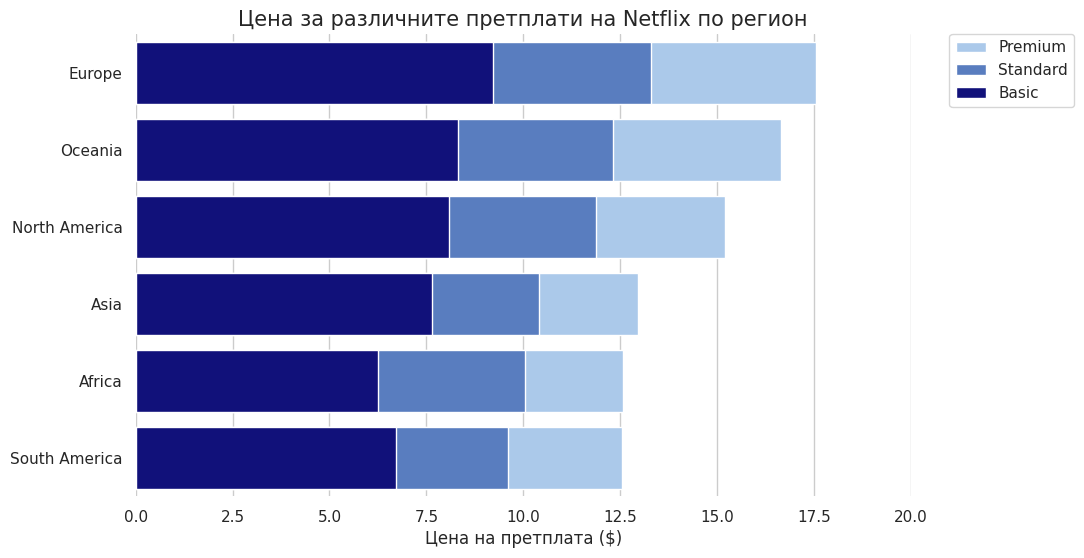

In [ ]:
sns.set_theme(style="whitegrid")

fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)

#Создаваме DataFrame од земјите по цена за претплата
region_cost = netflix_region_df.sort_values(by=['Average Premium Subscription Cost ($)'], ascending=False)

sns.set_color_codes("pastel")
sns.barplot(x=region_cost['Average Premium Subscription Cost ($)'], y=region_cost['Region'], label="Premium", color="b")
plt.title("Цена за различните претплати на Netflix по регион", fontsize=15)

sns.set_color_codes("muted")
sns.barplot(x=region_cost['Average Standard Subscription Cost ($)'], y=region_cost['Region'], label="Standard", color="b")

sns.set_color_codes("pastel")
sns.barplot(x=region_cost['Average Basic Subscription Cost ($)'], y=region_cost['Region'], label="Basic", color="darkblue")

# Правиме легенда на фигурата
ax.set(xlim=(0, 20), ylabel="", xlabel="Цена на претплата ($)")
sns.despine(left=True, bottom=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ПРОФИТ

In [ ]:
df_profit = pd.read_csv("/content/drive/MyDrive/Profit.csv")

In [ ]:
df_profit

,Year,Profit
0,2012,0.050
1,2013,0.228
2,2014,0.403
3,2015,0.306
4,2016,0.379
5,2017,0.839
6,2018,1.600
7,2019,2.600
8,2020,4.500


In [ ]:
x = df_profit['Year'].values
y = df_profit['Profit'].values

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

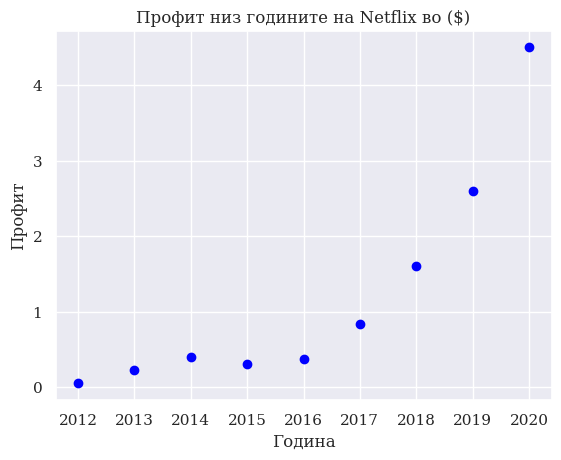

In [ ]:
plt.scatter(x, y, color='blue')
plt.xlabel('Година')
plt.ylabel("Профит")
plt.title("Профит низ годините на Netflix во ($)")
plt.plot

In [ ]:
sns.set(style = 'darkgrid', font = 'serif')

<Axes: xlabel='Year', ylabel='Profit'>

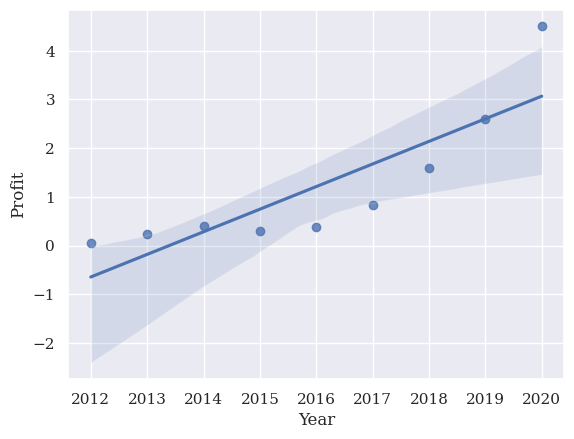

In [ ]:
sns.regplot(x='Year', y= 'Profit', data = df_profit)

ПРЕДИКЦИИ НА ЦЕНА НА АКЦИИ НА NETFLIX

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/NFLX.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [ ]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df.shape

(1009, 7)

In [ ]:
df=df["Close"]

In [ ]:
scaler=MinMaxScaler((0,1))
data=scaler.fit_transform(np.array(df).reshape([df.shape[0],1]))

In [ ]:
time_step=100
def createData(data):
    x=[]
    y=[]
    for i in range(len(data)-time_step-1):
        x.append(data[i:(i+time_step)])
        y.append(data[i+time_step])
    return x,y

In [ ]:
x,y=createData(data)

In [ ]:
x=np.array(x)
x=x.reshape(x.shape[0],x.shape[1],1)
y=np.array(y)

In [ ]:
df.shape

(1009,)

In [ ]:
xtrain,xtest,ytrain,ytest=x[:int(df.shape[0]*0.8)],x[int(df.shape[0]*0.8):],y[:int(df.shape[0]*0.8)],y[int(df.shape[0]*0.8):]

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [ ]:
model=Sequential([
    LSTM(128,return_sequences=True,input_shape=xtrain[0].shape),
    LSTM(64,return_sequences=True),
    LSTM(32),
    Dense(16,activation="relu"),
    Dense(1)
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss="mean_squared_error",metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [ ]:
model.fit(xtrain,ytrain,epochs=100)

Epoch 1/100
26/26 [==============================] - 17s 416ms/step - loss: 0.0254 - root_mean_squared_error: 0.1593
Epoch 2/100
26/26 [==============================] - 8s 283ms/step - loss: 0.0032 - root_mean_squared_error: 0.0570
Epoch 3/100
26/26 [==============================] - 7s 289ms/step - loss: 0.0029 - root_mean_squared_error: 0.0542
Epoch 4/100
26/26 [==============================] - 11s 436ms/step - loss: 0.0028 - root_mean_squared_error: 0.0527
Epoch 5/100
26/26 [==============================] - 13s 500ms/step - loss: 0.0026 - root_mean_squared_error: 0.0512
Epoch 6/100
26/26 [==============================] - 7s 257ms/step - loss: 0.0024 - root_mean_squared_error: 0.0494
Epoch 7/100
26/26 [==============================] - 8s 307ms/step - loss: 0.0025 - root_mean_squared_error: 0.0504
Epoch 8/100
26/26 [==============================] - 9s 359ms/step - loss: 0.0025 - root_mean_squared_error: 0.0499
Epoch 9/100
26/26 [==============================] - 7s 265ms/step - 

In [ ]:
model.evaluate(xtest,ytest)

4/4 [==============================] - 3s 108ms/step - loss: 0.0020 - root_mean_squared_error: 0.0451


[0.0020350164268165827, 0.04511115700006485]

In [ ]:
input_data=np.array(df[-time_step:])
input_data=input_data.reshape([input_data.shape[0],1])

In [ ]:
def predict(data,days=30):
    data=scaler.transform(data)
    predictions=[]
    i=1
    while(i<=days):
        nxtday=model.predict([data],verbose=0)
        predictions.append(scaler.inverse_transform(nxtday)[0])
        data[:-1]=data[1:]
        data[-1]=nxtday[0]
        i+=1
    return np.array(predictions).squeeze()

In [ ]:
days=30
predictions=predict(input_data,days)

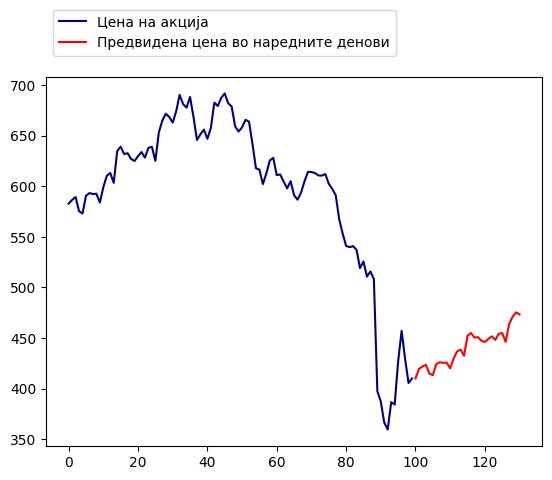

In [ ]:
trainPredPlot=np.zeros(shape=[len(input_data)+1+days])
trainPredPlot[:]=np.nan
trainPredPlot[len(input_data)]=input_data[-1]
trainPredPlot[len(input_data)+1:]=predictions
df_=input_data
plt.plot(df_,label="Цена на акција", color="navy")
plt.plot(trainPredPlot,label="Предвидена цена во наредните денови", color="red")
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.2))
plt.show()

КОРИСНИЦИ

In [ ]:
df_subscribers = pd.read_csv("/content/drive/MyDrive/NumSubscribers.csv")

In [ ]:
df_subscribers

,Year,Subscribers
0,2011,21.5
1,2012,25.7
2,2013,35.6
3,2014,47.9
4,2015,62.7
5,2016,79.9
6,2017,99.0
7,2018,124.3
8,2019,151.5
9,2020,192.9


In [ ]:
x1 = df_subscribers['Year'].values
y1 = df_subscribers['Subscribers'].values

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

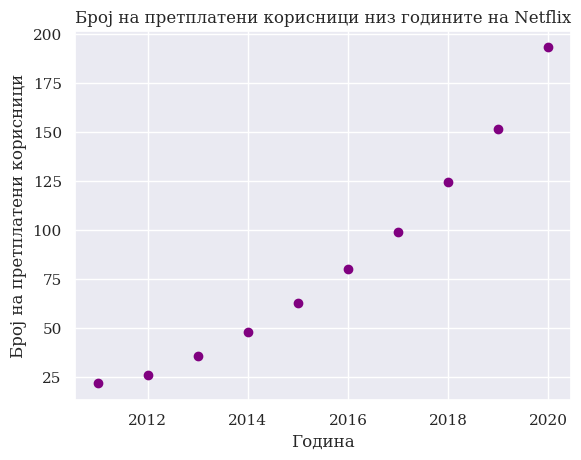

In [ ]:
plt.scatter(x1, y1, color='purple')
plt.xlabel('Година')
plt.ylabel("Број на претплатени корисници")
plt.title("Број на претплатени корисници низ годините на Netflix")
plt.plot

<Axes: xlabel='Year', ylabel='Subscribers'>

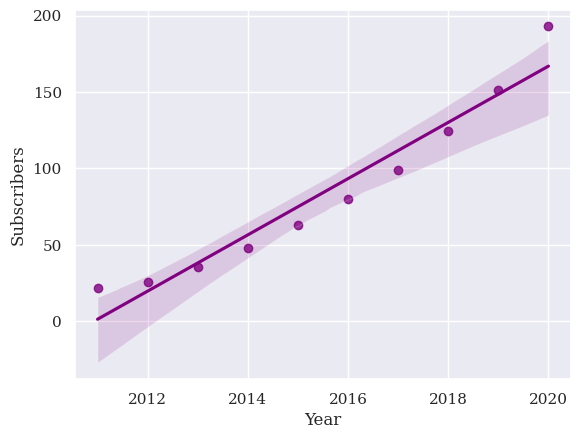

In [ ]:
sns.set(style = 'darkgrid', font = 'serif')
sns.regplot(x='Year', y= 'Subscribers', data = df_subscribers, color="purple")

In [ ]:
data_set = pd.read_csv("/content/drive/MyDrive/Netflix Userbase.csv")

In [ ]:
data_set.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


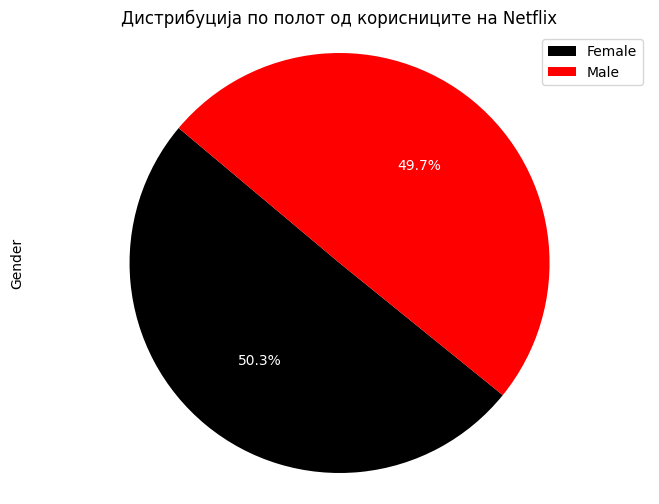

In [ ]:
gender_counts = data_set['Gender'].value_counts()
plt.figure(figsize=(8, 6))
custom_colors = ['black', 'red']
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=custom_colors, textprops={'color': 'white'})
plt.title('Дистрибуција по полот од корисниците на Netflix')
plt.axis('equal')
plt.legend(gender_counts.index, loc='best')
plt.show()

ПРЕПОРАКИ

In [ ]:
import ast
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [ ]:
df_credits=pd.read_csv('/content/drive/MyDrive/credits_reduced.csv')
df_keywords=pd.read_csv('/content/drive/MyDrive/keywords.csv')
df_movies=pd.read_csv('/content/drive/MyDrive/movies_metadata.csv')
df_ratings=pd.read_csv('/content/drive/MyDrive/ratings_reduced.csv')

In [ ]:
df_credits.head(2)

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602


In [ ]:
df_credits.dtypes

cast    object
crew    object
id       int64
dtype: object

In [ ]:
df_credits['cast'][0]

"[{'cast_id': 14, 'character': 'Woody (voice)', 'credit_id': '52fe4284c3a36847f8024f95', 'gender': 2, 'id': 31, 'name': 'Tom Hanks', 'order': 0, 'profile_path': '/pQFoyx7rp09CJTAb932F2g8Nlho.jpg'}, {'cast_id': 15, 'character': 'Buzz Lightyear (voice)', 'credit_id': '52fe4284c3a36847f8024f99', 'gender': 2, 'id': 12898, 'name': 'Tim Allen', 'order': 1, 'profile_path': '/uX2xVf6pMmPepxnvFWyBtjexzgY.jpg'}, {'cast_id': 16, 'character': 'Mr. Potato Head (voice)', 'credit_id': '52fe4284c3a36847f8024f9d', 'gender': 2, 'id': 7167, 'name': 'Don Rickles', 'order': 2, 'profile_path': '/h5BcaDMPRVLHLDzbQavec4xfSdt.jpg'}, {'cast_id': 17, 'character': 'Slinky Dog (voice)', 'credit_id': '52fe4284c3a36847f8024fa1', 'gender': 2, 'id': 12899, 'name': 'Jim Varney', 'order': 3, 'profile_path': '/eIo2jVVXYgjDtaHoF19Ll9vtW7h.jpg'}, {'cast_id': 18, 'character': 'Rex (voice)', 'credit_id': '52fe4284c3a36847f8024fa5', 'gender': 2, 'id': 12900, 'name': 'Wallace Shawn', 'order': 4, 'profile_path': '/oGE6JqPP2xH4t

In [ ]:
def convert1(obj):
    count=0
    L=[]
    for i in ast.literal_eval(obj):
        if count!=3:
            L.append(i['name'])
            count+=1
        else :
            break
    return L

In [ ]:
df_credits['cast']=df_credits['cast'].apply(convert1)

In [ ]:
df_credits['cast'][0]

['Tom Hanks', 'Tim Allen', 'Don Rickles']

In [ ]:
df_credits['crew'][0]

'[{\'credit_id\': \'52fe4284c3a36847f8024f49\', \'department\': \'Directing\', \'gender\': 2, \'id\': 7879, \'job\': \'Director\', \'name\': \'John Lasseter\', \'profile_path\': \'/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f4f\', \'department\': \'Writing\', \'gender\': 2, \'id\': 12891, \'job\': \'Screenplay\', \'name\': \'Joss Whedon\', \'profile_path\': \'/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f55\', \'department\': \'Writing\', \'gender\': 2, \'id\': 7, \'job\': \'Screenplay\', \'name\': \'Andrew Stanton\', \'profile_path\': \'/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f5b\', \'department\': \'Writing\', \'gender\': 2, \'id\': 12892, \'job\': \'Screenplay\', \'name\': \'Joel Cohen\', \'profile_path\': \'/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f61\', \'department\': \'Writing\', \'gender\': 0, \'id\': 12893, \'job\': \'Screenplay\', \'name\': \'A

In [ ]:
df_credits['crew'][1]

"[{'credit_id': '52fe466a9251416c75077a89', 'department': 'Directing', 'gender': 2, 'id': 26502, 'job': 'Director', 'name': 'Howard Deutch', 'profile_path': '/68Vae1HkU1NxQZ6KEmuxIpno7c9.jpg'}, {'credit_id': '52fe466b9251416c75077aa3', 'department': 'Writing', 'gender': 2, 'id': 16837, 'job': 'Characters', 'name': 'Mark Steven Johnson', 'profile_path': '/6trChNn3o2bi4i2ipgMEAytwmZp.jpg'}, {'credit_id': '52fe466b9251416c75077aa9', 'department': 'Writing', 'gender': 2, 'id': 16837, 'job': 'Writer', 'name': 'Mark Steven Johnson', 'profile_path': '/6trChNn3o2bi4i2ipgMEAytwmZp.jpg'}, {'credit_id': '5675eb4b92514179dd003933', 'department': 'Crew', 'gender': 2, 'id': 1551320, 'job': 'Sound Recordist', 'name': 'Jack Keller', 'profile_path': None}]"

In [ ]:
def convert_dir(obj):
    L=[]
    for i in ast.literal_eval(obj):
        if i['job']=='Director':
            L.append(i['name'])
        else:
            continue
    return L

In [ ]:
df_credits['director']=df_credits['crew'].apply(convert_dir)

In [ ]:
df_credits=df_credits[['id','director','cast']]
df_credits.head(2)

,id,director,cast
0,862,[John Lasseter],"[Tom Hanks, Tim Allen, Don Rickles]"
1,15602,[Howard Deutch],"[Walter Matthau, Jack Lemmon, Ann-Margret]"


In [ ]:
df_keywords.head(3)

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."


In [ ]:
df_keywords['keywords'][0]

"[{'id': 931, 'name': 'jealousy'}, {'id': 4290, 'name': 'toy'}, {'id': 5202, 'name': 'boy'}, {'id': 6054, 'name': 'friendship'}, {'id': 9713, 'name': 'friends'}, {'id': 9823, 'name': 'rivalry'}, {'id': 165503, 'name': 'boy next door'}, {'id': 170722, 'name': 'new toy'}, {'id': 187065, 'name': 'toy comes to life'}]"

In [ ]:

def convert(obj):
    L=[]
    for i in ast.literal_eval(obj):
        L.append(i['name'])
    return L

In [ ]:
df_keywords['keywords']=df_keywords['keywords'].apply(convert)

In [ ]:
df_movies.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [ ]:
df_movies.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [ ]:
df_movies[df_movies['revenue'].isna()]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19729,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,82663,tt0113002,en,Midnight Man,British soldiers force a recently captured IRA...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Midnight Man,False,6.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29502,False,"{'id': 122661, 'name': 'Mardock Scramble Colle...",0,"[{'id': 16, 'name': 'Animation'}, {'id': 878, ...",http://m-scramble.jp/exhaust/,122662,tt2423504,ja,マルドゥック・スクランブル 排気,Third film of the Mardock Scramble series.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,NaN,Mardock Scramble: The Third Exhaust,False,7.0,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35586,False,NaN,0,"[{'id': 10770, 'name': 'TV Movie'}, {'id': 28,...",NaN,249260,tt2622826,en,Avalanche Sharks,A group of skiers are terrorized during spring...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Beware Of Frost Bites,Avalanche Sharks,False,4.3,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_movies.dropna(subset=['revenue'],inplace=True)

In [ ]:
df_movies['budget']=df_movies['budget'].astype(float)

In [ ]:
df_movies['earnings']=df_movies['revenue']-df_movies['budget']

In [ ]:
df_movies.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'earnings'],
      dtype='object')

In [ ]:
df_movies.drop(['belongs_to_collection','budget','homepage','imdb_id','poster_path','production_countries','status','tagline','video','original_language','revenue','production_companies','popularity'],axis=1,inplace=True)

In [ ]:
df_movies.shape

(45460, 12)

In [ ]:
df_movies.dropna(inplace=True)

In [ ]:

df_movies['genres']=df_movies['genres'].apply(convert)

In [ ]:
df_movies['spoken_languages']=df_movies['spoken_languages'].apply(convert)

In [ ]:
df_movies['adult']=df_movies['adult'].astype(bool).astype(int)
df_movies['adult']=df_movies['adult'].replace(1,0)

In [ ]:
df_movies['overview']=df_movies['overview'].apply(lambda x:x.split())

In [ ]:
final_df1=pd.merge(df_credits,df_keywords,on='id')

In [ ]:
df_movies['id']=df_movies['id'].astype(int)
df_movies['release_date']=pd.to_datetime(df_movies['release_date'])

In [ ]:
final_df=pd.merge(final_df1,df_movies,on='id')

In [ ]:
final_df.columns

Index(['id', 'director', 'cast', 'keywords', 'adult', 'genres',
       'original_title', 'overview', 'release_date', 'runtime',
       'spoken_languages', 'title', 'vote_average', 'vote_count', 'earnings'],
      dtype='object')

In [ ]:
final_df.head(2)

,id,director,cast,keywords,adult,genres,original_title,overview,release_date,runtime,spoken_languages,title,vote_average,vote_count,earnings
0,862,[John Lasseter],"[Tom Hanks, Tim Allen, Don Rickles]","[jealousy, toy, boy, friendship, friends, riva...",0,"[Animation, Comedy, Family]",Toy Story,"[Led, by, Woody,, Andy's, toys, live, happily,...",1995-10-30,81.0,[English],Toy Story,7.7,5415.0,343554033.0
1,15602,[Howard Deutch],"[Walter Matthau, Jack Lemmon, Ann-Margret]","[fishing, best friend, duringcreditsstinger, o...",0,"[Romance, Comedy]",Grumpier Old Men,"[A, family, wedding, reignites, the, ancient, ...",1995-12-22,101.0,[English],Grumpier Old Men,6.5,92.0,0.0


In [ ]:
df1=final_df[['id','title','overview','genres','keywords','cast','director']]

In [ ]:
df1.head(1)

,id,title,overview,genres,keywords,cast,director
0,862,Toy Story,"[Led, by, Woody,, Andy's, toys, live, happily,...","[Animation, Comedy, Family]","[jealousy, toy, boy, friendship, friends, riva...","[Tom Hanks, Tim Allen, Don Rickles]",[John Lasseter]


In [ ]:
df1['genres']=df1['genres'].apply(lambda x:[i.replace(" ",'')for i in x])
df1['keywords']=df1['keywords'].apply(lambda x:[i.replace(" ",'')for i in x])
df1['cast']=df1['cast'].apply(lambda x:[i.replace(" ",'')for i in x])
df1['director']=df1['director'].apply(lambda x:[i.replace(" ",'')for i in x])

In [ ]:
df1['strings']=df1['overview']+df1['genres']+df1['keywords']+df1['cast']+df1['director']

In [ ]:
df1.head(1)

,id,title,overview,genres,keywords,cast,director,strings
0,862,Toy Story,"[Led, by, Woody,, Andy's, toys, live, happily,...","[Animation, Comedy, Family]","[jealousy, toy, boy, friendship, friends, riva...","[TomHanks, TimAllen, DonRickles]",[JohnLasseter],"[Led, by, Woody,, Andy's, toys, live, happily,..."


In [ ]:
new_df=df1[['id','title','strings']]
new_df.head()

,id,title,strings
0,862,Toy Story,"[Led, by, Woody,, Andy's, toys, live, happily,..."
1,15602,Grumpier Old Men,"[A, family, wedding, reignites, the, ancient, ..."
2,11862,Father of the Bride Part II,"[Just, when, George, Banks, has, recovered, fr..."
3,11860,Sabrina,"[An, ugly, duckling, having, undergone, a, rem..."
4,9091,Sudden Death,"[International, action, superstar, Jean, Claud..."


In [ ]:
new_df['strings']=new_df['strings'].apply(lambda x:" ".join(x))

In [ ]:
new_df['strings'][2]

"Just when George Banks has recovered from his daughter's wedding, he receives the news that she's pregnant ... and that George's wife, Nina, is expecting too. He was planning on selling their home, but that's a plan that -- like George -- will have to change with the arrival of both a grandchild and a kid of his own. Comedy baby midlifecrisis confidence aging daughter motherdaughterrelationship pregnancy contraception gynecologist SteveMartin DianeKeaton MartinShort CharlesShyer"

In [ ]:
new_df['strings']=new_df['strings'].apply(lambda x:x.lower())

In [ ]:
new_df.head()

,id,title,strings
0,862,Toy Story,"led by woody, andy's toys live happily in his ..."
1,15602,Grumpier Old Men,a family wedding reignites the ancient feud be...
2,11862,Father of the Bride Part II,just when george banks has recovered from his ...
3,11860,Sabrina,an ugly duckling having undergone a remarkable...
4,9091,Sudden Death,international action superstar jean claude van...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=5000,stop_words='english')

In [ ]:
vectors=cv.fit_transform(new_df['strings']).toarray()

In [ ]:
cv.fit_transform(new_df['strings']).toarray().shape

(22771, 5000)

In [ ]:
import nltk
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [ ]:
def stem(text):
    y=[]
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)

In [ ]:
new_df['strings']=new_df['strings'].apply(stem)

In [ ]:
new_df['strings'][31]

'bud and doyl are two loser who are do noth with their lives. both of their girlfriend are activ involv in save the environment, but the two friend couldn\'t care less about save the earth. one day, when a group of scientist begin a mission to live insid a "bio-dome" for a year without outsid contact, bud and doyl mistakenli becom part of the project themselves. comedi biotop vegetarian pollut paulyshor stephenbaldwin joeylaurenadam jasonbloom'

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
similarity=cosine_similarity(vectors)

In [ ]:
similarity

array([[0.05128205, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.08571429, 0.02817181, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.02817181, 0.05555556, ..., 0.        , 0.        ,
        0.0186339 ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.05892557,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.05892557, 1.        ,
        0.        ],
       [0.        , 0.        , 0.0186339 , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
sorted(list(enumerate(similarity[0])),reverse=True,key=lambda x:x[1])[1:6]

[(19344, 0.48507125007266594),
 (14358, 0.3849001794597505),
 (16591, 0.3779644730092272),
 (5910, 0.3481553119113957),
 (13594, 0.34299717028501764)]

In [ ]:
def recommend(movie):
    movie_index=new_df[new_df['title']==movie].index[0]
    distance=similarity[movie_index]
    movies_list=sorted(list(enumerate(distance)),reverse=True,key=lambda x:x[1])[1:6]
    for i in movies_list:
        print(new_df.iloc[i[0]].title)

In [ ]:
recommend('Toy Story')

Legend of Crystania: The Motion Picture
Sleeping Beauty
Dirty Weekend
Maniac Cop
The Little Hut


CHURN PREDICTION - ПРЕДИКЦИИ КОИ КОРИСНИЦИ НЕМА ДА СЕ ПРЕТПЛАТАТ ПОВТОРНО

In [ ]:
from math import sqrt

In [ ]:
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import sklearn.metrics as metrics

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/customer_data.csv")

In [ ]:
df

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,353-2080,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0


In [ ]:
df.drop('customer_id', axis='columns', inplace=True)
df.dtypes

year                        int64
phone_no                   object
gender                     object
age                         int64
no_of_days_subscribed       int64
multi_screen               object
mail_subscribed            object
weekly_mins_watched       float64
minimum_daily_mins        float64
maximum_daily_mins        float64
weekly_max_night_mins       int64
videos_watched              int64
maximum_days_inactive     float64
customer_support_calls      int64
churn                     float64
dtype: object

In [ ]:
df.drop('year', axis='columns', inplace=True)

In [ ]:
df.head()

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


In [ ]:
df.gender.fillna('Female',inplace=True)

In [ ]:
df.isnull().sum()

gender                     0
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

In [ ]:
print("The Median is :", int(df.maximum_days_inactive.median()))

The Median is : 3


In [ ]:
df.maximum_days_inactive.fillna(3, inplace=True)

In [ ]:
print("The Median is :", int(df.churn.median()))

The Median is : 0


In [ ]:
df.churn.fillna(0, inplace=True)

In [ ]:
df.isnull().sum()

gender                    0
age                       0
no_of_days_subscribed     0
multi_screen              0
mail_subscribed           0
weekly_mins_watched       0
minimum_daily_mins        0
maximum_daily_mins        0
weekly_max_night_mins     0
videos_watched            0
maximum_days_inactive     0
customer_support_calls    0
churn                     0
dtype: int64

In [ ]:
df2 = pd.get_dummies(df,columns=['gender','multi_screen','mail_subscribed'],drop_first=True)
df2.head()

,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn,gender_Male,multi_screen_yes,mail_subscribed_yes
0,36,62,148.35,12.2,16.81,82,1,4.0,1,0.0,0,0,0
1,39,149,294.45,7.7,33.37,87,3,3.0,2,0.0,0,0,0
2,65,126,87.30,11.9,9.89,91,1,4.0,5,1.0,0,0,0
3,24,131,321.30,9.5,36.41,102,4,3.0,3,0.0,0,0,1
4,40,191,243.00,10.9,27.54,83,7,3.0,1,0.0,0,0,0


In [ ]:
X = df2.drop("churn",axis=1)
Y = df2["churn"]

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc=sc.fit(X)
X=sc.transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=42)

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

The accuracy score is  90.0 %
[[495  25]
 [ 35  45]]


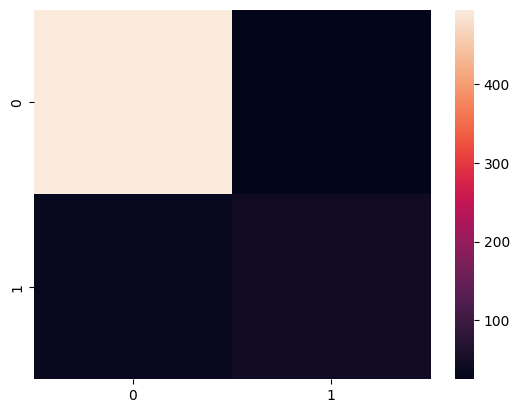

In [ ]:
y_pred = classifier.predict(X_test)
accuracy = metrics.accuracy_score(Y_test,y_pred)
confusion_matrix = metrics.confusion_matrix(Y_test,y_pred)

print('The accuracy score is ',accuracy*100,'%')
sns.heatmap(confusion_matrix)
print(confusion_matrix)

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = Y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 92.93 %
Standard Deviation: 1.13 %


In [ ]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94       520
         1.0       0.64      0.56      0.60        80

    accuracy                           0.90       600
   macro avg       0.79      0.76      0.77       600
weighted avg       0.90      0.90      0.90       600



In [ ]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

СПОРЕДБА СО ДРУГИ ОТТ ПЛАТФОРМИ

In [ ]:
movies = pd.read_csv("/content/drive/MyDrive/MoviesOnStreamingPlatforms.csv")

In [ ]:
df = pd.DataFrame(movies)
df.head()

,Unnamed: 0,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,The Irishman,2019,18+,98/100,1,0,0,0,0
1,1,2,Dangal,2016,7+,97/100,1,0,0,0,0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0
4,4,5,Roma,2018,18+,94/100,1,0,0,0,0


In [ ]:
df.isnull().sum()

Unnamed: 0            0
ID                    0
Title                 0
Year                  0
Age                4177
Rotten Tomatoes       7
Netflix               0
Hulu                  0
Prime Video           0
Disney+               0
Type                  0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(5338, 11)

In [ ]:
df.drop('Type',axis=1,inplace=True)

In [ ]:
df.shape

(5338, 10)

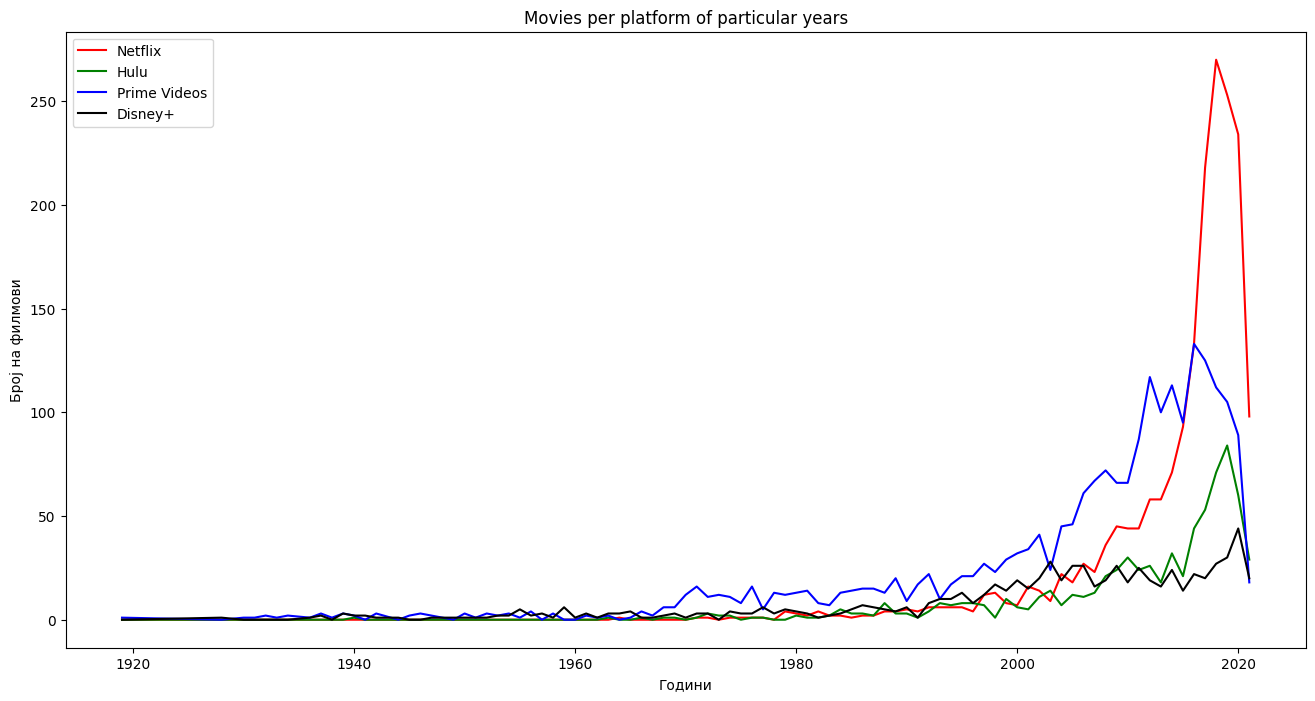

In [ ]:
mpppy = df.groupby('Year')[['Netflix','Hulu','Prime Video','Disney+']].sum()
plt.figure(figsize = (16, 8))
sns.lineplot(x=mpppy.index,y=mpppy['Netflix'], color='red', label='Netflix')
sns.lineplot(x=mpppy.index,y=mpppy['Hulu'], color = 'green', label='Hulu')
sns.lineplot(x=mpppy.index,y=mpppy['Prime Video'], color = 'blue', label='Prime Videos')
sns.lineplot(x=mpppy.index,y=mpppy['Disney+'], color = 'black', label='Disney+')
plt.title("Movies per platform of particular years")
plt.legend()
plt.xlabel('Години')
plt.ylabel('Број на филмови')
plt.show()

In [ ]:
movies_df=pd.read_csv("/content/drive/MyDrive/MoviesOnStreamingPlatforms.csv")

In [ ]:
movies_df.head()

,Unnamed: 0,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,The Irishman,2019,18+,98/100,1,0,0,0,0
1,1,2,Dangal,2016,7+,97/100,1,0,0,0,0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0
4,4,5,Roma,2018,18+,94/100,1,0,0,0,0


In [ ]:
movies_df = pd.melt(movies_df, id_vars = ['ID', 'Title', 'Year', 'Age', 'Rotten Tomatoes', 'Type'],
        value_vars = ['Netflix', 'Hulu', 'Prime Video', 'Disney+'], var_name = 'Streaming Platform')
movies_df = movies_df[movies_df['value'] == 1].drop(['value', 'Type'], axis = 1) #Type is being dropped here because the value will always be 0, since the whole dataset represents only movies
movies_df.head()

,ID,Title,Year,Age,Rotten Tomatoes,Streaming Platform
0,1,The Irishman,2019,18+,98/100,Netflix
1,2,Dangal,2016,7+,97/100,Netflix
2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,Netflix
3,4,Lagaan: Once Upon a Time in India,2001,7+,94/100,Netflix
4,5,Roma,2018,18+,94/100,Netflix


In [ ]:
movies_count = movies_df.groupby('Streaming Platform', as_index = False).count()
movies_count = movies_count[['Streaming Platform', 'ID']].rename({'ID' : 'Count'}, axis = 'columns')
movies_count = movies_count.sort_values(by = 'Count', ascending = False)
color_map={
    "Prime Video": "rgb(4, 165, 222)",
    "Netflix": "rgb(223, 9, 18)",
    "Hulu": "rgb(2, 228, 119)",
    "Disney+": "rgb(0, 0, 0)"
}

import plotly.express as px

fig = px.bar(movies_count, y='Streaming Platform', x="Count", color="Streaming Platform", orientation="h",
             color_discrete_map= color_map, text = "Count"
            )

fig.update_layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    title="Number of movies offered by platform",
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Стриминг платформа',
        titlefont_size=16,
        tickfont_size=14
    ),
    xaxis=dict(
        title='Број на филмови',
    ),
    legend=dict(
        x=1,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
)

fig.show()

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/MoviesOnStreamingPlatforms.csv")

In [ ]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [ ]:
df

,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,1,The Irishman,2019,18+,98/100,1,0,0,0,0
1,2,Dangal,2016,7+,97/100,1,0,0,0,0
2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0
3,4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0
4,5,Roma,2018,18+,94/100,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9510,9511,Most Wanted Sharks,2020,NaN,14/100,0,0,0,1,0
9511,9512,Doc McStuffins: The Doc Is In,2020,NaN,13/100,0,0,0,1,0
9512,9513,Ultimate Viking Sword,2019,NaN,13/100,0,0,0,1,0
9513,9514,Hunt for the Abominable Snowman,2011,NaN,10/100,0,0,0,1,0


In [ ]:
df_netflix=df[df["Netflix"]==1]
df_hulu=df[df["Hulu"]==1]
df_prime=df[df["Prime Video"]==1]
df_disney=df[df["Disney+"]==1]

print(df_disney.shape)
print(df_hulu.shape)
print(df_netflix.shape)
print(df_prime.shape)
print(df.shape)

(922, 10)
(1047, 10)
(3695, 10)
(4113, 10)
(9515, 10)


In [ ]:
df_netflix.drop(['Hulu', 'Prime Video', 'Disney+'], axis = 1,inplace=True)
df_disney.drop(['Hulu', 'Prime Video', 'Netflix'], axis = 1,inplace=True)
df_hulu.drop(['Netflix', 'Prime Video', 'Disney+'], axis = 1,inplace=True)
df_prime.drop(['Hulu', 'Netflix', 'Disney+'], axis = 1,inplace=True)

<ipython-input-112-fc464e0aa463>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-112-fc464e0aa463>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-112-fc464e0aa463>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-112-fc464e0aa463>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/

In [ ]:
df_netflix.head()

,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Type
0,1,The Irishman,2019,18+,98/100,1,0
1,2,Dangal,2016,7+,97/100,1,0
2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0
3,4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0
4,5,Roma,2018,18+,94/100,1,0


In [ ]:
df_copy = df_netflix.copy()

In [ ]:
df_copy.head()

,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Type
0,1,The Irishman,2019,18+,98/100,1,0
1,2,Dangal,2016,7+,97/100,1,0
2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0
3,4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0
4,5,Roma,2018,18+,94/100,1,0


In [ ]:
import re

In [ ]:
def extract_numeric_rating(text):
    match = re.search(r'(\d+)', str(text))
    if match:
        return int(match.group(1))
    else:
        return None

In [ ]:
df_netflix['Rotten Tomatoes'] = df_netflix['Rotten Tomatoes'].apply(extract_first_part)

<ipython-input-115-402239d61704>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_netflix

,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Type
0,1,The Irishman,2019,18+,98.0,1,0
1,2,Dangal,2016,7+,97.0,1,0
2,3,David Attenborough: A Life on Our Planet,2020,7+,95.0,1,0
3,4,Lagaan: Once Upon a Time in India,2001,7+,94.0,1,0
4,5,Roma,2018,18+,94.0,1,0
...,...,...,...,...,...,...,...
3690,3691,Thomas & Friends: Marvelous Machinery: World o...,2020,NaN,NaN,1,0
3691,3692,ChuChuTV Bedtime Stories & Moral Stories for K...,2019,NaN,NaN,1,0
3692,3693,Fifty Year Old Teenager,1996,NaN,NaN,1,0
3693,3694,"Alias JJ, la celebridad del mal",2017,NaN,NaN,1,0


In [ ]:
df_disney['Rotten Tomatoes'] = df_disney['Rotten Tomatoes'].apply(extract_first_part)

<ipython-input-117-c84508ff78b0>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_hulu['Rotten Tomatoes'] = df_hulu['Rotten Tomatoes'].apply(extract_first_part)

<ipython-input-119-f7d8d7f4218f>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_prime['Rotten Tomatoes'] = df_prime['Rotten Tomatoes'].apply(extract_first_part)

<ipython-input-120-380df118bcf8>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_disney

,ID,Title,Year,Age,Rotten Tomatoes,Disney+,Type
270,271,White Fang,2018,7+,76,1,0
712,713,Muppets Most Wanted,2014,7+,67,1,0
1330,1331,Zapped,2014,all,59,1,0
1813,1814,The Blue Umbrella,2005,NaN,54,1,0
2029,2030,Sky High,2020,NaN,51,1,0
...,...,...,...,...,...,...,...
9510,9511,Most Wanted Sharks,2020,NaN,14,1,0
9511,9512,Doc McStuffins: The Doc Is In,2020,NaN,13,1,0
9512,9513,Ultimate Viking Sword,2019,NaN,13,1,0
9513,9514,Hunt for the Abominable Snowman,2011,NaN,10,1,0


In [ ]:
disney8=df_disney[df_disney["Rotten Tomatoes"]>80]
hulu8=df_hulu[df_hulu["Rotten Tomatoes"]>80]
netflix8=df_netflix[df_netflix["Rotten Tomatoes"]>80]
prime8=df_prime[df_prime["Rotten Tomatoes"]>80]

count_disney8=len(disney8)
count_hulu8=len(hulu8)
count_netflix8=len(netflix8)
count_prime8=len(prime8)

names=["Prime", "Hulu", "Netflix", "Disney+"]
colors=['navy', 'black', 'red', 'purple']
values=[count_prime8, count_hulu8, count_netflix8, count_disney8]
fig=px.pie(names=names, values=values)
fig.update_traces(marker=dict(colors=colors))
fig.update_layout(
    width=600,
    height=600,
)
fig.show()

In [ ]:
movies_df=pd.read_csv("/content/drive/MyDrive/MoviesOnStreamingPlatforms.csv")

In [ ]:
movies_df.head()

,Unnamed: 0,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,The Irishman,2019,18+,98/100,1,0,0,0,0
1,1,2,Dangal,2016,7+,97/100,1,0,0,0,0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0
4,4,5,Roma,2018,18+,94/100,1,0,0,0,0


In [ ]:
movies_df = pd.melt(movies_df, id_vars = ['ID', 'Title', 'Year', 'Age', 'Rotten Tomatoes', 'Type'],
        value_vars = ['Netflix', 'Hulu', 'Prime Video', 'Disney+'], var_name = 'Streaming Platform')
movies_df = movies_df[movies_df['value'] == 1].drop(['value', 'Type'], axis = 1) #Type is being dropped here because the value will always be 0, since the whole dataset represents only movies
movies_df.head()

,ID,Title,Year,Age,Rotten Tomatoes,Streaming Platform
0,1,The Irishman,2019,18+,98/100,Netflix
1,2,Dangal,2016,7+,97/100,Netflix
2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,Netflix
3,4,Lagaan: Once Upon a Time in India,2001,7+,94/100,Netflix
4,5,Roma,2018,18+,94/100,Netflix


In [ ]:
def extract_numeric_rating(text):
    match = re.search(r'(\d+)', str(text))
    if match:
        return int(match.group(1))
    else:
        return None

In [ ]:
movies_df['Rotten Tomatoes'] = movies_df['Rotten Tomatoes'].apply(extract_first_part)

In [ ]:
movies_df

,ID,Title,Year,Age,Rotten Tomatoes,Streaming Platform
0,1,The Irishman,2019,18+,98.0,Netflix
1,2,Dangal,2016,7+,97.0,Netflix
2,3,David Attenborough: A Life on Our Planet,2020,7+,95.0,Netflix
3,4,Lagaan: Once Upon a Time in India,2001,7+,94.0,Netflix
4,5,Roma,2018,18+,94.0,Netflix
...,...,...,...,...,...,...
38055,9511,Most Wanted Sharks,2020,NaN,14.0,Disney+
38056,9512,Doc McStuffins: The Doc Is In,2020,NaN,13.0,Disney+
38057,9513,Ultimate Viking Sword,2019,NaN,13.0,Disney+
38058,9514,Hunt for the Abominable Snowman,2011,NaN,10.0,Disney+


In [ ]:
import plotly.graph_objects as go

In [ ]:
list_of_sp = movies_count['Streaming Platform'].tolist()

movies_df_not_null = movies_df[~movies_df['Rotten Tomatoes'].isnull()]

fig = go.Figure()

rows_counter = 0
for sp, clr in zip(list_of_sp, color_map.values()):

        fig.add_trace(go.Box(
            x=movies_df_not_null[movies_df_not_null['Streaming Platform'] == sp]['Streaming Platform'],
            y=movies_df_not_null[movies_df_not_null['Streaming Platform'] == sp]['Rotten Tomatoes'],
            name=sp,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=clr,
            marker_size=2,
            line_width=1)
        )

        min_value = round(np.percentile(movies_df_not_null[movies_df_not_null['Streaming Platform'] == sp]['Rotten Tomatoes'], 0), 2)
        first_quartile = round(np.percentile(movies_df_not_null[movies_df_not_null['Streaming Platform'] == sp]['Rotten Tomatoes'], 25), 2)
        median = round(np.percentile(movies_df_not_null[movies_df_not_null['Streaming Platform'] == sp]['Rotten Tomatoes'], 50), 2)
        third_quartile = round(np.percentile(movies_df_not_null[movies_df_not_null['Streaming Platform'] == sp]['Rotten Tomatoes'], 75), 2)
        max_value = round(np.percentile(movies_df_not_null[movies_df_not_null['Streaming Platform'] == sp]['Rotten Tomatoes'], 100), 2)

        for y_desc, y_value in zip(('MinV: ', 'Q1: ', 'Med: ', 'Q3: ', 'MaxV: '), (min_value, first_quartile, median, third_quartile, max_value)):

            fig.add_annotation(
                        x=rows_counter + 0.35,
                        ax = 0,
                        ay = 0,
                        y=y_value,
                        text=y_desc + str(y_value))

        rows_counter += 1

fig.update_layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    title='Distribution of movies Rotten Tomatoes score by streaming platform',
    yaxis=dict(
        title='Оценка на Rotten Tomatoes',
        titlefont_size=16,
        tickfont_size=14
    ))


fig.show()

In [ ]:
movies_df=pd.read_csv("/content/drive/MyDrive/MoviesOnStreamingPlatforms.csv")

In [ ]:
movies_df

,Unnamed: 0,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,The Irishman,2019,18+,98/100,1,0,0,0,0
1,1,2,Dangal,2016,7+,97/100,1,0,0,0,0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0
4,4,5,Roma,2018,18+,94/100,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9510,9510,9511,Most Wanted Sharks,2020,NaN,14/100,0,0,0,1,0
9511,9511,9512,Doc McStuffins: The Doc Is In,2020,NaN,13/100,0,0,0,1,0
9512,9512,9513,Ultimate Viking Sword,2019,NaN,13/100,0,0,0,1,0
9513,9513,9514,Hunt for the Abominable Snowman,2011,NaN,10/100,0,0,0,1,0


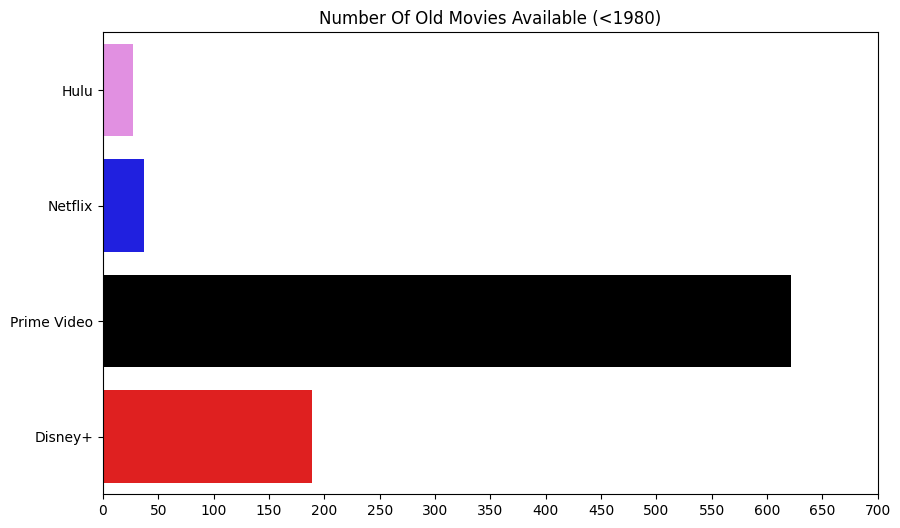

In [ ]:
old_movies_df = movies_df.loc[movies_df.Year < 1980]
chosen_columns = ['Hulu', 'Netflix', 'Prime Video', 'Disney+']
old_movies = old_movies_df[chosen_columns].sum()
custom_colors = ['violet', 'blue', 'black', 'red']

plt.figure(figsize=(10,6))
plt.title('Number Of Old Movies Available (<1980)')
sns.barplot(x=old_movies.values, y=old_movies.index, palette=custom_colors)
plt.xticks(np.arange(0,750,50))
plt.show()

In [ ]:
credits = pd.read_csv('/content/drive/MyDrive/credits_reduced.csv')
keywords = pd.read_csv('/content/drive/MyDrive/keywords.csv')
movies = pd.read_csv('/content/drive/MyDrive/movies_metadata.csv').\
                     drop(['belongs_to_collection', 'homepage', 'imdb_id', 'poster_path', 'status', 'title', 'video'], axis=1).\
                     drop([19730, 29503, 35587])

movies['id'] = movies['id'].astype('int64')

df = movies.merge(keywords, on='id').\
    merge(credits, on='id')

df['original_language'] = df['original_language'].fillna('')
df['runtime'] = df['runtime'].fillna(0)
df['tagline'] = df['tagline'].fillna('')

df.dropna(inplace=True)

<ipython-input-247-9acdc5a664f9>:3: DtypeWarning:

Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.



In [ ]:
from ast import literal_eval

In [ ]:
def get_text(text, obj='name'):
    text = literal_eval(text)

    if len(text) == 1:
        for i in text:
            return i[obj]
    else:
        s = []
        for i in text:
            s.append(i[obj])
        return ', '.join(s)

df['genres'] = df['genres'].apply(get_text)
df['production_companies'] = df['production_companies'].apply(get_text)
df['production_countries'] = df['production_countries'].apply(get_text)
df['crew'] = df['crew'].apply(get_text)
df['spoken_languages'] = df['spoken_languages'].apply(get_text)
df['keywords'] = df['keywords'].apply(get_text)

df['characters'] = df['cast'].apply(get_text, obj='character')
df['actors'] = df['cast'].apply(get_text)

df.drop('cast', axis=1, inplace=True)
df = df[~df['original_title'].duplicated()]
df = df.reset_index(drop=True)

In [ ]:
df = df.rename(columns={'genres': 'Genres'})
df.head()

,adult,budget,Genres,id,original_language,original_title,overview,popularity,production_companies,production_countries,...,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,keywords,crew,characters,actors
0,False,30000000,"Animation, Comedy, Family",862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,Pixar Animation Studios,United States of America,...,373554033.0,81.0,English,,7.7,5415.0,"jealousy, toy, boy, friendship, friends, rival...","John Lasseter, Joss Whedon, Andrew Stanton, Jo...","Woody (voice), Buzz Lightyear (voice), Mr. Pot...","Tom Hanks, Tim Allen, Don Rickles, Jim Varney,..."
1,False,0,"Romance, Comedy",15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,"Warner Bros., Lancaster Gate",United States of America,...,0.0,101.0,English,Still Yelling. Still Fighting. Still Ready for...,6.5,92.0,"fishing, best friend, duringcreditsstinger, ol...","Howard Deutch, Mark Steven Johnson, Mark Steve...","Max Goldman, John Gustafson, Ariel Gustafson, ...","Walter Matthau, Jack Lemmon, Ann-Margret, Soph..."
2,False,0,Comedy,11862,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"Sandollar Productions, Touchstone Pictures",United States of America,...,76578911.0,106.0,English,Just When His World Is Back To Normal... He's ...,5.7,173.0,"baby, midlife crisis, confidence, aging, daugh...","Alan Silvestri, Elliot Davis, Nancy Meyers, Na...","George Banks, Nina Banks, Franck Eggelhoffer, ...","Steve Martin, Diane Keaton, Martin Short, Kimb..."
3,False,58000000,"Comedy, Romance",11860,en,Sabrina,An ugly duckling having undergone a remarkable...,6.677277,"Paramount Pictures, Scott Rudin Productions, M...","Germany, United States of America",...,0.0,127.0,"Français, English",You are cordially invited to the most surprisi...,6.2,141.0,"paris, brother brother relationship, chauffeur...","Sydney Pollack, Barbara Benedek, Sydney Pollac...","Linus Larrabee, Sabrina Fairchild, David Larra...","Harrison Ford, Julia Ormond, Greg Kinnear, Ang..."
4,False,35000000,"Action, Adventure, Thriller",9091,en,Sudden Death,International action superstar Jean Claude Van...,5.23158,"Universal Pictures, Imperial Entertainment, Si...",United States of America,...,64350171.0,106.0,English,Terror goes into overtime.,5.5,174.0,"terrorist, hostage, explosive, vice president","Peter Hyams, Karen Elise Baldwin, Gene Quintan...","Darren Francis Thomas McCord, Joshua Foss, Mat...","Jean-Claude Van Damme, Powers Boothe, Dorian H..."


In [ ]:
from wordcloud import WordCloud

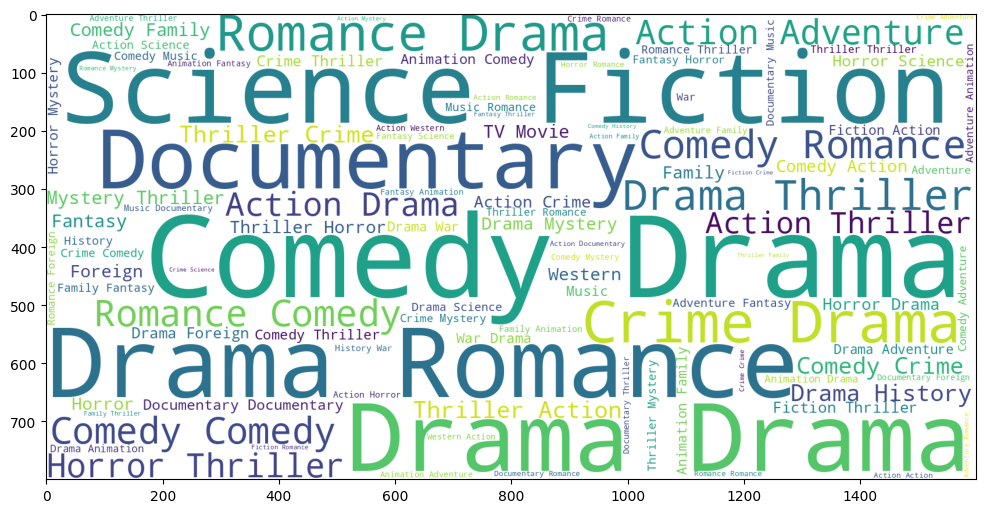

In [ ]:
plt.figure(figsize=(12,12))
wc = WordCloud(max_words=1000, min_font_size=10,
                height=800,width=1600,background_color="white").generate(' '.join(df['Genres']))

plt.imshow(wc)

In [ ]:
df

,adult,budget,Genres,id,original_language,original_title,overview,popularity,production_companies,production_countries,...,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,keywords,crew,characters,actors
0,False,30000000,"Animation, Comedy, Family",862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,Pixar Animation Studios,United States of America,...,373554033.0,81.0,English,,7.7,5415.0,"jealousy, toy, boy, friendship, friends, rival...","John Lasseter, Joss Whedon, Andrew Stanton, Jo...","Woody (voice), Buzz Lightyear (voice), Mr. Pot...","Tom Hanks, Tim Allen, Don Rickles, Jim Varney,..."
1,False,0,"Romance, Comedy",15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,"Warner Bros., Lancaster Gate",United States of America,...,0.0,101.0,English,Still Yelling. Still Fighting. Still Ready for...,6.5,92.0,"fishing, best friend, duringcreditsstinger, ol...","Howard Deutch, Mark Steven Johnson, Mark Steve...","Max Goldman, John Gustafson, Ariel Gustafson, ...","Walter Matthau, Jack Lemmon, Ann-Margret, Soph..."
2,False,0,Comedy,11862,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"Sandollar Productions, Touchstone Pictures",United States of America,...,76578911.0,106.0,English,Just When His World Is Back To Normal... He's ...,5.7,173.0,"baby, midlife crisis, confidence, aging, daugh...","Alan Silvestri, Elliot Davis, Nancy Meyers, Na...","George Banks, Nina Banks, Franck Eggelhoffer, ...","Steve Martin, Diane Keaton, Martin Short, Kimb..."
3,False,58000000,"Comedy, Romance",11860,en,Sabrina,An ugly duckling having undergone a remarkable...,6.677277,"Paramount Pictures, Scott Rudin Productions, M...","Germany, United States of America",...,0.0,127.0,"Français, English",You are cordially invited to the most surprisi...,6.2,141.0,"paris, brother brother relationship, chauffeur...","Sydney Pollack, Barbara Benedek, Sydney Pollac...","Linus Larrabee, Sabrina Fairchild, David Larra...","Harrison Ford, Julia Ormond, Greg Kinnear, Ang..."
4,False,35000000,"Action, Adventure, Thriller",9091,en,Sudden Death,International action superstar Jean Claude Van...,5.23158,"Universal Pictures, Imperial Entertainment, Si...",United States of America,...,64350171.0,106.0,English,Terror goes into overtime.,5.5,174.0,"terrorist, hostage, explosive, vice president","Peter Hyams, Karen Elise Baldwin, Gene Quintan...","Darren Francis Thomas McCord, Joshua Foss, Mat...","Jean-Claude Van Damme, Powers Boothe, Dorian H..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21656,False,0,Documentary,276895,en,Deep Hearts,"Deep Hearts is a film about the Bororo Fulani,...",0.011025,,United States of America,...,0.0,58.0,"Fulfulde, English",,0.0,0.0,,"Robert Fulton, Robert Gardner, Robert Gardner,...",,
21657,False,0,"Horror, Mystery, Thriller",84419,en,House of Horrors,An unsuccessful sculptor saves a madman named ...,0.222814,Universal Pictures,United States of America,...,0.0,65.0,English,Meet...The CREEPER!,6.3,8.0,"revenge, murder, serial killer, new york city,...","Russell A. Gausman, John B. Goodman, Jack P. P...","The Creeper, Steven Morrow, Joan Medford, Poli...","Rondo Hatton, Robert Lowery, Virginia Grey, Bi..."
21658,False,0,Horror,289923,en,The Burkittsville 7,A film archivist revisits the story of Rustin ...,0.38645,"Neptune Salad Entertainment, Pirie Productions",United States of America,...,0.0,30.0,English,"Do you know what happened 50 years before ""The...",7.0,1.0,"witch, mythology, legend, serial killer, mocku...","Ben Rock, Ben Rock","Branwall, Sarah Didonna, Kyle Brody, Bill Barn...","Monty Bane, Lucy Butler, David Grammer, Bill D..."
21659,False,0,Drama,111109,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,Sine Olivia,Philippines,...,0.0,360.0,,,9.0,3.0,"artist, play, pinoy","Lav Diaz, Lav Diaz, Dante Perez, Lav Diaz, Lav...","Sister Angela, Homer, Cra

In [ ]:
df['release_date']

0        1995-10-30
1        1995-12-22
2        1995-02-10
3        1995-12-15
4        1995-12-22
            ...    
21656    1981-01-01
21657    1946-03-29
21658    2000-10-03
21659    2011-11-17
21660    1917-10-21
Name: release_date, Length: 21661, dtype: object

In [ ]:
df_copy=df.copy()

In [ ]:
df_copy['release_date']

0        1995-10-30
1        1995-12-22
2        1995-02-10
3        1995-12-15
4        1995-12-22
            ...    
21656    1981-01-01
21657    1946-03-29
21658    2000-10-03
21659    2011-11-17
21660    1917-10-21
Name: release_date, Length: 21661, dtype: object

In [ ]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [ ]:
df['release_year'] = df['release_date'].dt.year

In [ ]:
df['release_year'] = df['release_year'].astype(int)

In [ ]:
df['release_year']

0        1995
1        1995
2        1995
3        1995
4        1995
         ... 
21656    1981
21657    1946
21658    2000
21659    2011
21660    1917
Name: release_year, Length: 21661, dtype: int64

In [ ]:
df['vote_average']

0        7.7
1        6.5
2        5.7
3        6.2
4        5.5
        ... 
21656    0.0
21657    6.3
21658    7.0
21659    9.0
21660    0.0
Name: vote_average, Length: 21661, dtype: float64

In [ ]:
top_5_genres = ['Drama','Documentary','Comedy', 'Action','Horror']
table = df.loc[:,['release_year','Genres','vote_average']]
table['AvgRating'] = table.groupby([table.Genres,table.release_year])['vote_average'].transform('mean')
table.drop('vote_average', axis=1, inplace=True)
table = table[(table.release_year>2009) & (table.release_year<2020)]
table = table.loc[table['Genres'].isin(top_5_genres)]
table = table.sort_values('release_year')

In [ ]:
fig=px.bar(table,x='Genres', y='AvgRating', animation_frame='release_year',
           animation_group='Genres', color='Genres', hover_name='Genres', range_y=[0,10])
fig.update_layout(showlegend=False)
fig.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings

warnings.filterwarnings('ignore')
pd.set_option('Display.max_columns', 100)

In [ ]:
prime = pd.read_csv('/content/drive/MyDrive/amazon_prime_titles.csv')
netflix = pd.read_csv('/content/drive/MyDrive/lab/netflix_titles.csv')
disney = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/disney_plus_titles.csv')

In [ ]:
netflix = netflix.applymap(lambda x : x.lower() if type(x) == str else x)
prime = prime.applymap(lambda x : x.lower() if type(x) == str else x)
disney = disney.applymap(lambda x : x.lower() if type(x) == str else x)

In [ ]:
print(netflix.rating.unique())
print(prime.rating.unique())
print(disney.rating.unique())

['pg-13' 'tv-ma' 'pg' 'tv-14' 'tv-pg' 'tv-y' 'tv-y7' 'r' 'tv-g' 'g'
 'nc-17' '74 min' '84 min' '66 min' 'nr' nan 'tv-y7-fv' 'ur']
[nan '13+' 'all' '18+' 'r' 'tv-y' 'tv-y7' 'nr' '16+' 'tv-pg' '7+' 'tv-14'
 'tv-nr' 'tv-g' 'pg-13' 'tv-ma' 'g' 'pg' 'nc-17' 'unrated' '16' 'ages_16_'
 'ages_18_' 'all_ages' 'not_rate']
['tv-g' 'pg' 'tv-pg' nan 'pg-13' 'tv-14' 'g' 'tv-y7' 'tv-y' 'tv-y7-fv']


In [ ]:
rating_map_dict = {
    'pg':'7+', 'tv-y7':'7+', 'tv-pg':'7+', 'tv-y7-fv':'7+','pg-13':'13+', '16':'16+', 'ages_16':'16+', 'tv-14':'16+',
    'ages_18':'18+', 'tv-ma':'18+', 'nc-17':'18+', 'nr':'18+', 'ur':'18+', 'tv-nr':'18+', 'r':'18+',
    'g': 'all', 'tv-y':'all', 'tv-g':'all', 'all_ages':'all', 'not_rate': 'unrated', '74 min':'unrated', '84 min':'unrated', '66 min':'unrated'
}

In [ ]:
netflix['rating'] = netflix['rating'].map(rating_map_dict)
prime['rating'] = prime['rating'].map(rating_map_dict)
disney['rating'] = disney['rating'].map(rating_map_dict)

In [ ]:
netflix.loc[netflix.rating.isnull(),'rating'] = 'unrated'
prime.loc[prime.rating.isnull(),'rating'] = 'unrated'
disney.loc[disney.rating.isnull(),'rating'] = 'unrated'

In [ ]:
print(netflix.rating.unique())
print(prime.rating.unique())
print(disney.rating.unique())

['13+' '18+' '7+' '16+' 'all' 'unrated']
['unrated' '18+' 'all' '7+' '16+' '13+']
['all' '7+' 'unrated' '13+' '16+']


In [ ]:
ott_movies = pd.concat([netflix, prime, disney], join='inner')
ott_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19925 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       19925 non-null  object
 1   type          19925 non-null  object
 2   title         19925 non-null  object
 3   director      14736 non-null  object
 4   cast          17677 non-null  object
 5   country       9879 non-null   object
 6   date_added    10399 non-null  object
 7   release_year  19925 non-null  int64 
 8   rating        19925 non-null  object
 9   duration      19922 non-null  object
 10  listed_in     19925 non-null  object
 11  description   19925 non-null  object
dtypes: int64(1), object(11)
memory usage: 2.0+ MB


In [ ]:
ott_movies.drop_duplicates(subset=['title','release_year'], inplace=True)
ott_movies.drop_duplicates(subset=['title','director'], inplace=True)
ott_movies.drop_duplicates(subset=['title','director','release_year'], inplace=True)
ott_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19600 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       19600 non-null  object
 1   type          19600 non-null  object
 2   title         19600 non-null  object
 3   director      14502 non-null  object
 4   cast          17374 non-null  object
 5   country       9807 non-null   object
 6   date_added    10349 non-null  object
 7   release_year  19600 non-null  int64 
 8   rating        19600 non-null  object
 9   duration      19597 non-null  object
 10  listed_in     19600 non-null  object
 11  description   19600 non-null  object
dtypes: int64(1), object(11)
memory usage: 1.9+ MB


In [ ]:
ott_movies.fillna('none',inplace=True)
ott_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19600 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       19600 non-null  object
 1   type          19600 non-null  object
 2   title         19600 non-null  object
 3   director      19600 non-null  object
 4   cast          19600 non-null  object
 5   country       19600 non-null  object
 6   date_added    19600 non-null  object
 7   release_year  19600 non-null  int64 
 8   rating        19600 non-null  object
 9   duration      19600 non-null  object
 10  listed_in     19600 non-null  object
 11  description   19600 non-null  object
dtypes: int64(1), object(11)
memory usage: 1.9+ MB


In [ ]:
def getNetflixFlag(row):
    df = netflix.loc[netflix['title'] == row.title]
    if(df.shape[0]>=1):
        if(df.loc[df['director'].str.contains(row.director, case=False)==True].shape[0] > 0):
            return True
        elif(df.loc[df['release_year'] == row.release_year].shape[0] > 0):
            return True
    return False

In [ ]:
def getPrimeFlag(row):
    df = prime.loc[prime['title'] == row.title]
    if(df.shape[0]>=1):
        if(df.loc[df['director'].str.contains(row.director, case=False)==True].shape[0] > 0):
            return True
        elif(df.loc[df['release_year'] == row.release_year].shape[0] > 0):
            return True
    return False

In [ ]:
def getDisneyFlag(row):
    df = disney.loc[disney['title'] == row.title]
    if(df.shape[0]>=1):
        if(df.loc[df['director'].str.contains(row.director, case=False)==True].shape[0] > 0):
            return True
        elif(df.loc[df['release_year'] == row.release_year].shape[0] > 0):
            return True
    return False

In [ ]:
netFlixflags=[]
disneyFlags=[]
primeFlags=[]
for index, row in ott_movies.iterrows():
    netFlixflags.append(getNetflixFlag(row))
    primeFlags.append(getPrimeFlag(row))
    disneyFlags.append(getDisneyFlag(row))

In [ ]:
netFlixflags = list(map(int, netFlixflags))
primeFlags = list(map(int, primeFlags))
disneyFlags = list(map(int, disneyFlags))

In [ ]:
flagsDF = pd.DataFrame(list(zip(netFlixflags,primeFlags,disneyFlags)),columns=['netflix','prime','disney'])
ott_movies.reset_index(inplace=True, drop=True)
flagsDF.reset_index(inplace=True, drop=True)
ott_movies = pd.concat([ott_movies,flagsDF], axis=1)
ott_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,netflix,prime,disney
0,s1,movie,dick johnson is dead,kirsten johnson,none,united states,"september 25, 2021",2020,13+,90 min,documentaries,"as her father nears the end of his life, filmm...",1,0,0
1,s2,tv show,blood & water,none,"ama qamata, khosi ngema, gail mabalane, thaban...",south africa,"september 24, 2021",2021,18+,2 seasons,"international tv shows, tv dramas, tv mysteries","after crossing paths at a party, a cape town t...",1,0,0
2,s3,tv show,ganglands,julien leclercq,"sami bouajila, tracy gotoas, samuel jouy, nabi...",none,"september 24, 2021",2021,18+,1 season,"crime tv shows, international tv shows, tv act...",to protect his family from a powerful drug lor...,1,0,0
3,s4,tv show,jailbirds new orleans,none,none,none,"september 24, 2021",2021,18+,1 season,"docuseries, reality tv","feuds, flirtations and toilet talk go down amo...",1,0,0
4,s5,tv show,kota factory,none,"mayur more, jitendra kumar, ranjan raj, alam k...",india,"september 24, 2021",2021,18+,2 seasons,"international tv shows, romantic tv shows, tv ...",in a city of coaching centers known to train i...,1,0,0


In [ ]:
movies = pd.read_table('/content/drive/MyDrive/AllMoviesDetailsCleaned.csv',delimiter=';')
cast = pd.read_table('/content/drive/MyDrive/kol/AllMoviesCastingRaw.csv',delimiter=';')

In [ ]:
print(movies.columns)
print(cast.columns)

Index(['id', 'budget', 'genres', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'production_companies_number',
       'production_countries_number', 'spoken_languages_number'],
      dtype='object')
Index(['id', 'actor1_name', 'actor1_gender', 'actor2_name', 'actor2_gender',
       'actor3_name', 'actor3_gender', 'actor4_name', 'actor4_gender',
       'actor5_name', 'actor5_gender', 'actor_number', 'director_name',
       'director_gender', 'director_number', 'producer_name',
       'producer_number', 'screeplay_name', 'editor_name'],
      dtype='object')


In [ ]:
cols = ['imdb_id','original_title','overview','production_companies','production_countries','runtime','spoken_languages','spoken_languages_number','tagline','production_companies_number','production_countries_number','status']
movies.query("status == 'Released'", inplace=True)
movies.drop(columns=cols, inplace=True)
movies['release_date'] = pd.to_datetime(movies['release_date']).dt.year
movies.rename(columns={'original_language':'language','release_date':'release_year'}, inplace=True)
movies.head(1)

,id,budget,genres,language,popularity,release_year,revenue,title,vote_average,vote_count
0,2,0,Drama|Crime,fi,0.823904,1988.0,0,Ariel,7.1,40


In [ ]:
cols=['actor1_gender','actor2_gender','actor3_gender','actor4_gender','actor5_gender','actor4_name','actor5_name','actor_number','director_gender','director_number','producer_name','producer_number','screeplay_name','editor_name']
cast.drop(columns=cols, inplace=True)
cast.rename(columns={'director_name':'director'}, inplace=True)
cast.head(1)

,id,actor1_name,actor2_name,actor3_name,director
0,2,Turo Pajala,Susanna Haavisto,Matti Pellonpää,Aki Kaurismäki


In [ ]:
movies = movies.merge(cast,on='id',how='inner')
movies = movies.applymap(lambda x : x.lower() if type(x) == str else x)
movies['release_year'] = movies['release_year'].astype('Int64')
movies.reset_index(inplace=True, drop=True)
movies.drop(columns=['id'], inplace=True)
movies.head(3)

,budget,genres,language,popularity,release_year,revenue,title,vote_average,vote_count,actor1_name,actor2_name,actor3_name,director
0,0,drama|crime,fi,0.823904,1988,0,ariel,7.1,40,turo pajala,susanna haavisto,matti pellonpää,aki kaurismäki
1,0,drama|comedy,fi,0.47445,1986,0,shadows in paradise,7.0,32,matti pellonpää,kati outinen,sakari kuosmanen,aki kaurismäki
2,4000000,crime|comedy,en,1.698,1995,4300000,four rooms,6.5,485,tim roth,antonio banderas,jennifer beals,allison anders


In [ ]:
df1 = ott_movies.merge(movies, on=['title','director'], how='inner')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5349 entries, 0 to 5348
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   show_id         5349 non-null   object 
 1   type            5349 non-null   object 
 2   title           5349 non-null   object 
 3   director        5349 non-null   object 
 4   cast            5349 non-null   object 
 5   country         5349 non-null   object 
 6   date_added      5349 non-null   object 
 7   release_year_x  5349 non-null   int64  
 8   rating          5349 non-null   object 
 9   duration        5349 non-null   object 
 10  listed_in       5349 non-null   object 
 11  description     5349 non-null   object 
 12  netflix         5349 non-null   int64  
 13  prime           5349 non-null   int64  
 14  disney          5349 non-null   int64  
 15  budget          5349 non-null   int64  
 16  genres          4843 non-null   object 
 17  language        5347 non-null   o

In [ ]:
df1.drop(columns=['release_year_y'], inplace=True)
df1.rename(columns={'release_year_x':'release_year'}, inplace=True)
df1.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,netflix,prime,disney,budget,genres,language,popularity,revenue,vote_average,vote_count,actor1_name,actor2_name,actor3_name
0,s8,movie,sankofa,haile gerima,"kofi ghanaba, oyafunmike ogunlano, alexandra d...","united states, ghana, burkina faso, united kin...","september 24, 2021",1993,18+,125 min,"dramas, independent movies, international movies","on a photo shoot in ghana, an american model s...",1,0,0,1000000,drama,en,1.2e-05,2691899,6.1,4,kofi ghanaba,oyafunmike ogunlano,alexandra duah


In [ ]:
df1.isna().sum().where(lambda x : x>0).dropna()

genres      506.0
language      2.0
dtype: float64

In [ ]:
df1[df1['language'].isnull() == True]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,netflix,prime,disney,budget,genres,language,popularity,revenue,vote_average,vote_count,actor1_name,actor2_name,actor3_name
3685,s5554,movie,unfinished sky,peter duncan,"william mcinnes, monic hendrickx, milo, bille ...",none,none,2019,unrated,94 min,romance,honest australian outback sheep-farmer leads a...,0,1,0,0,romance|drama,NaN,0.000867,0,6.4,8,william mcinnes,monic hendrickx,bille brown
3967,s6734,movie,return to blood fart lake,chris seaver,none,none,none,2021,unrated,72 min,horror,many years have passed since the tragic events...,0,1,0,3000,horror,NaN,0.001773,0,6.0,1,none,jesse ames,andrew baltes


In [ ]:
df1.loc[df1.language.isnull() == True, 'language'] = 'en'
df1['genres'].fillna('unspecified', inplace=True)

In [ ]:
movies['release_year'].fillna(0, inplace=True)
df2 = ott_movies.merge(movies, on=['title','release_year'], how='inner')
df2.shape

(5627, 26)

In [ ]:
df2.isna().sum().where(lambda x : x>0).dropna()

genres    526.0
dtype: float64

In [ ]:
df2['genres'].fillna('unspecified', inplace=True)

In [ ]:
df2.rename(columns={'director_x':'director'}, inplace=True)
df2.drop(columns=['director_y'], inplace=True)

In [ ]:
final_df = pd.concat([df1,df2], axis=0, join='inner')
final_df.shape

(10976, 25)

In [ ]:
final_df.drop_duplicates(subset=['title','director','release_year'], inplace=True)
final_df.drop_duplicates(subset=['title','director'], inplace=True)
final_df.drop_duplicates(subset=['title','release_year'], inplace=True)
final_df.shape

(6461, 25)

In [ ]:
final_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,netflix,prime,disney,budget,genres,language,popularity,revenue,vote_average,vote_count,actor1_name,actor2_name,actor3_name
0,s8,movie,sankofa,haile gerima,"kofi ghanaba, oyafunmike ogunlano, alexandra d...","united states, ghana, burkina faso, united kin...","september 24, 2021",1993,18+,125 min,"dramas, independent movies, international movies","on a photo shoot in ghana, an american model s...",1,0,0,1000000,drama,en,1.2e-05,2691899,6.1,4,kofi ghanaba,oyafunmike ogunlano,alexandra duah
1,s25,movie,jeans,s. shankar,"prashanth, aishwarya rai bachchan, sri lakshmi...",india,"september 21, 2021",1998,16+,166 min,"comedies, international movies, romantic movies",when the father of the man she loves insists t...,1,0,0,0,comedy|drama|romance,ta,0.380405,0,6.3,9,prashanth thyagarajan,aishwarya rai bachchan,nassar
2,s27,movie,minsara kanavu,rajiv menon,"arvind swamy, kajol, prabhu deva, nassar, s.p....",none,"september 21, 2021",1997,7+,147 min,"comedies, international movies, music & musicals",a tangled love triangle ensues when a man fall...,1,0,0,0,drama|romance|foreign,ta,0.014394,0,3.5,1,prabhu deva,arvind swamy,kajol
3,s28,movie,grown ups,dennis dugan,"adam sandler, kevin james, chris rock, david s...",united states,"september 20, 2021",2010,13+,103 min,comedies,mourning the loss of their beloved junior high...,1,0,0,80000000,comedy,en,3.287506,271430189,6.0,1592,adam sandler,salma hayek,maria bello
4,s29,movie,dark skies,scott stewart,"keri russell, josh hamilton, j.k. simmons, dak...",united states,"september 19, 2021",2013,13+,97 min,"horror movies, sci-fi & fantasy",a family’s idyllic suburban life shatters when...,1,0,0,3500000,science fiction|thriller|horror,en,2.473641,25174316,6.0,610,keri russell,josh hamilton,dakota goyo


In [ ]:
genres = final_df.genres.str.split('|')

unified_list = []
total_genres = set()
for genre in genres:
    unified_list = unified_list + genre
    total_genres = set(unified_list)
total_genres

{'action',
 'adventure',
 'animation',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'family',
 'fantasy',
 'foreign',
 'history',
 'horror',
 'music',
 'mystery',
 'romance',
 'science fiction',
 'thriller',
 'tv movie',
 'unspecified',
 'war',
 'western'}

In [ ]:
for genre in total_genres:
    lst = []
    for index, row in final_df.iterrows():
        if(genre in row['genres'].split('|')):
            lst.append(1)
        else:
            lst.append(0)
    final_df[genre] = pd.Series(lst)

final_df.drop(columns=['genres'],inplace=True)
final_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,netflix,prime,disney,budget,language,popularity,revenue,vote_average,vote_count,actor1_name,actor2_name,actor3_name,thriller,foreign,fantasy,history,mystery,animation,horror,action,drama,crime,adventure,comedy,music,documentary,family,romance,tv movie,war,science fiction,unspecified,western
0,s8,movie,sankofa,haile gerima,"kofi ghanaba, oyafunmike ogunlano, alexandra d...","united states, ghana, burkina faso, united kin...","september 24, 2021",1993,18+,125 min,"dramas, independent movies, international movies","on a photo shoot in ghana, an american model s...",1,0,0,1000000,en,1.2e-05,2691899,6.1,4,kofi ghanaba,oyafunmike ogunlano,alexandra duah,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,s25,movie,jeans,s. shankar,"prashanth, aishwarya rai bachchan, sri lakshmi...",india,"september 21, 2021",1998,16+,166 min,"comedies, international movies, romantic movies",when the father of the man she loves insists t...,1,0,0,0,ta,0.380405,0,6.3,9,prashanth thyagarajan,aishwarya rai bachchan,nassar,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
2,s27,movie,minsara kanavu,rajiv menon,"arvind swamy, kajol, prabhu deva, nassar, s.p....",none,"september 21, 2021",1997,7+,147 min,"comedies, international movies, music & musicals",a tangled love triangle ensues when a man fall...,1,0,0,0,ta,0.014394,0,3.5,1,prabhu deva,arvind swamy,kajol,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,s28,movie,grown ups,dennis dugan,"adam sandler, kevin james, chris rock, david s...",united states,"september 20, 2021",2010,13+,103 min,comedies,mourning the loss of their beloved junior high...,1,0,0,80000000,en,3.287506,271430189,6.0,1592,adam sandler,salma hayek,maria bello,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,s29,movie,dark skies,scott stewart,"keri russell, josh hamilton, j.k. simmons, dak...",united states,"september 19, 2021",2013,13+,97 min,"horror movies, sci-fi & fantasy",a family’s idyllic suburban life shatters when...,1,0,0,3500000,en,2.473641,25174316,6.0,610,keri russell,josh hamilton,dakota goyo,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
top5languages = final_df.groupby('language').size().sort_values(ascending=False).head(5)
primelanguages = final_df[final_df.prime==1].groupby('language').size().sort_values(ascending=False).head(5)
disneylanguages = final_df[final_df.disney==1].groupby('language').size().sort_values(ascending=False).head(5)
netflixlanguages = final_df[final_df.netflix==1].groupby('language').size().sort_values(ascending=False).head(5)

In [ ]:
top5languages

language
en    5343
hi     304
es     105
ta     104
fr      88
dtype: int64

In [ ]:
language_dict = {'en' : 'English', 'hi':'Hindi', 'ta':'Tamil', 'it':'Italian', 'fr':'French', 'cn':'Chinese', 'es':'Spanish','ko': 'Korean', 'de': 'Dutch'}
l1 = list(map(lambda x: language_dict[x], list(top5languages.index)))
l2 = list(map(lambda x: language_dict[x], list(netflixlanguages.index)))
l3 = list(map(lambda x: language_dict[x], list(primelanguages.index)))
l4 = list(map(lambda x: language_dict[x], list(disneylanguages.index)))

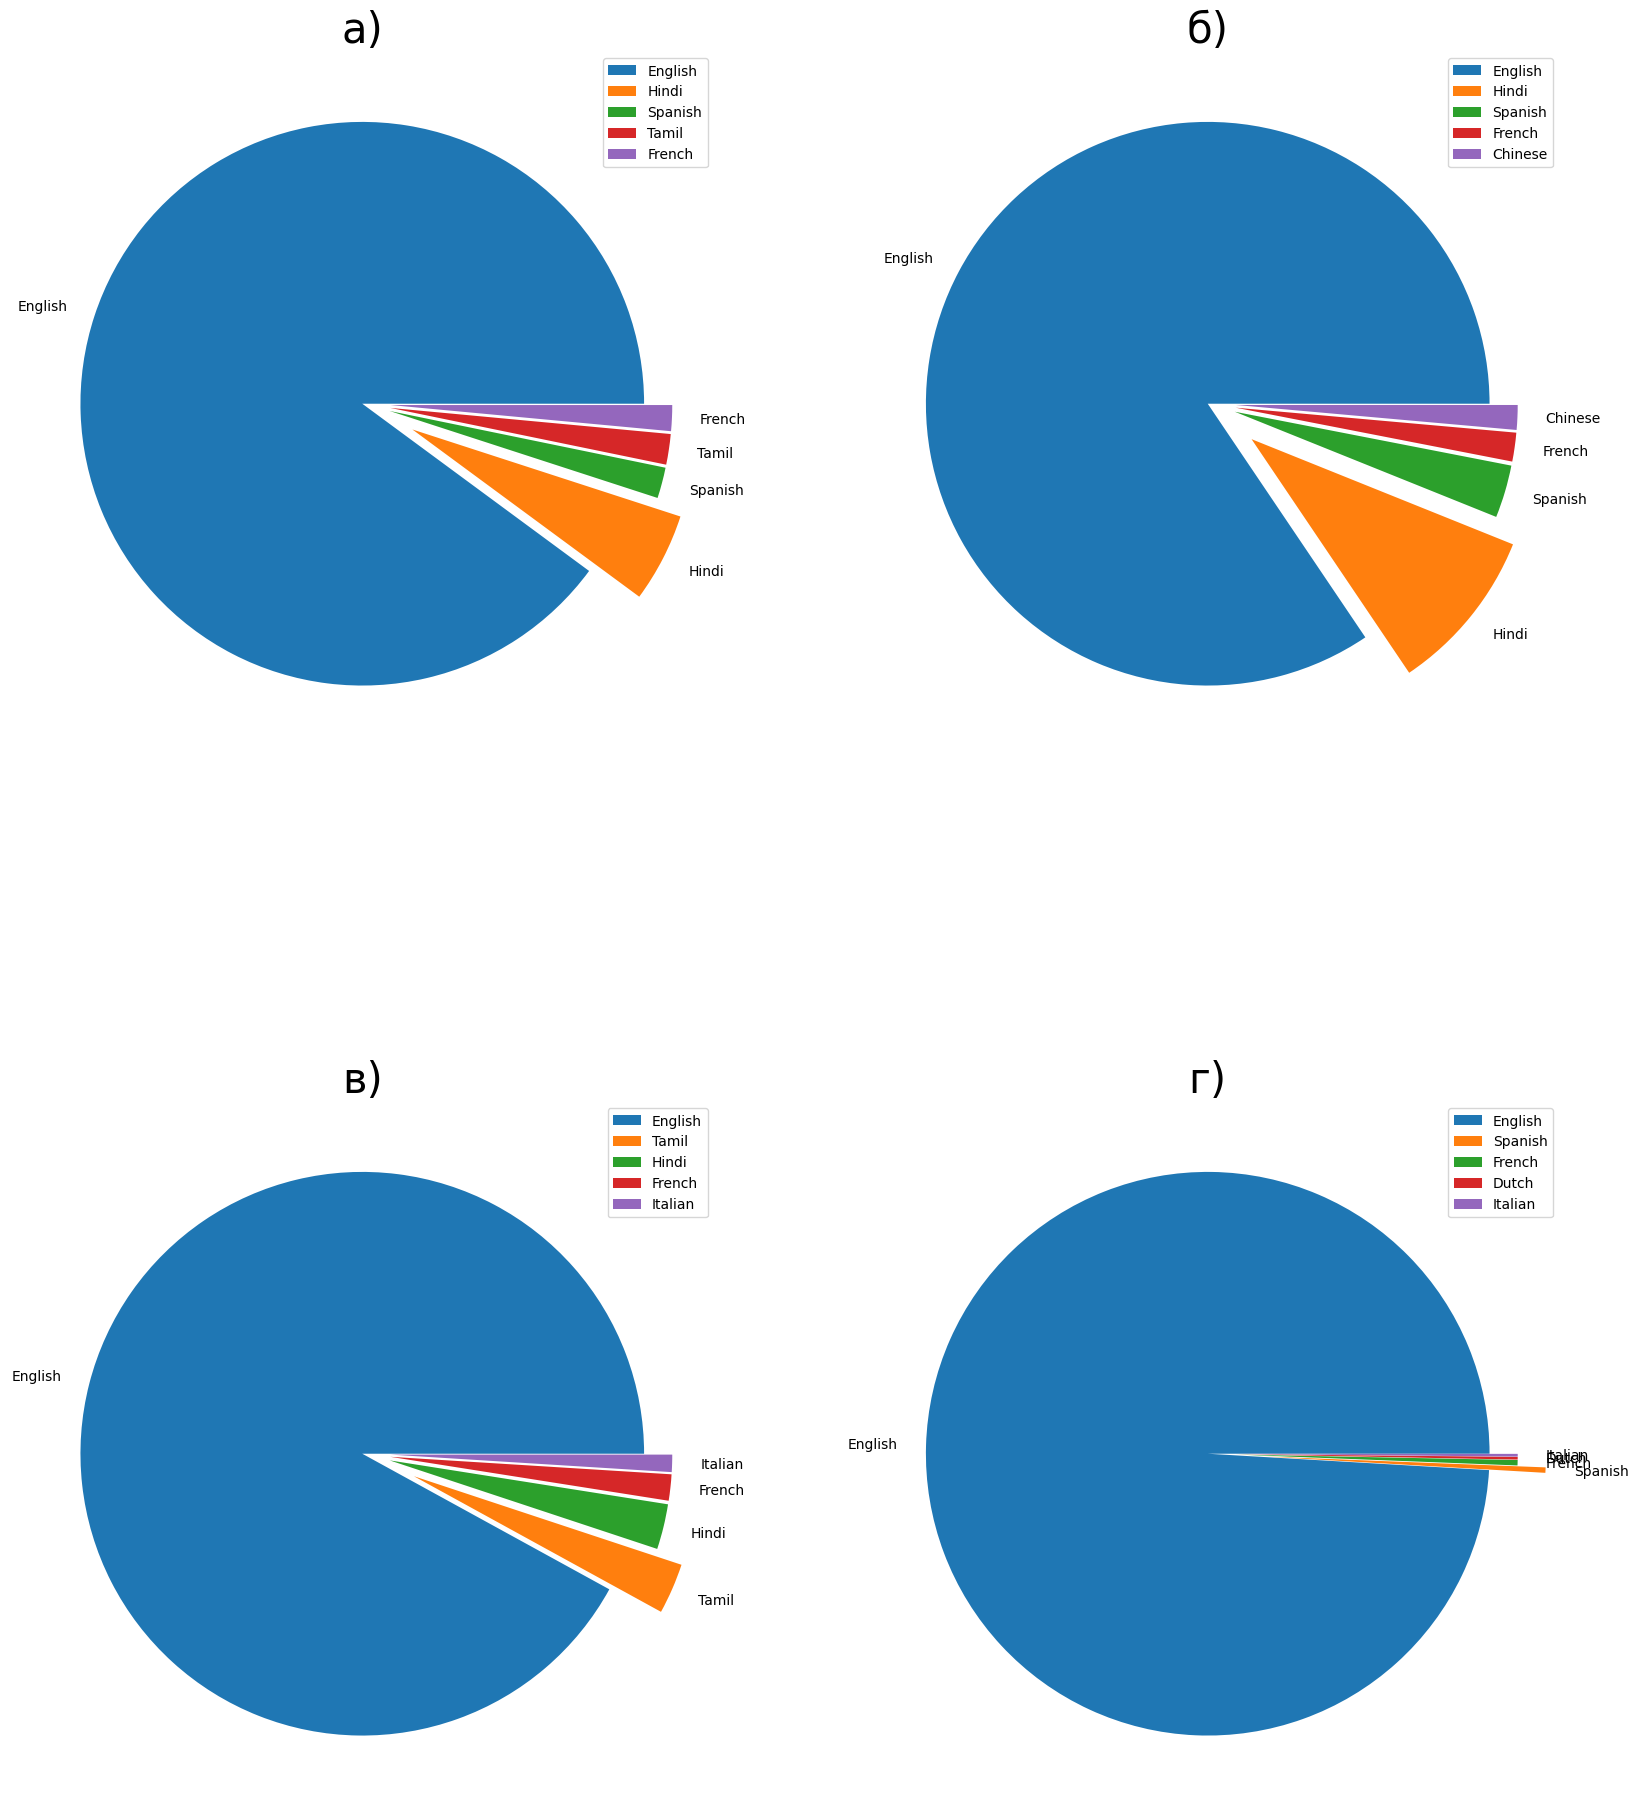

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

fig.set_figheight(25)
fig.set_figwidth(20)

ax1.pie(top5languages, labels=l1, explode=[0,0.2,0.1,0.1,0.1])
ax1.set_title('а)', fontsize=30)
ax1.legend()

ax2.pie(netflixlanguages, labels=l2, explode=[0,0.2,0.1,0.1,0.1])
ax2.set_title('б)', fontsize=30)
ax2.legend()

ax3.pie(primelanguages, labels=l3, explode=[0,0.2,0.1,0.1,0.1])
ax3.set_title('в)', fontsize=30)
ax3.legend()

ax4.pie(disneylanguages, labels=l4, explode=[0,0.2,0.1,0.1,0.1])
ax4.set_title('г)', fontsize=30)
ax4.legend()

plt.show()

In [ ]:
genre_cols = ['war', 'mystery', 'tv movie', 'science fiction', 'horror', 'animation',
       'action', 'history', 'western', 'foreign', 'music', 'adventure',
       'thriller', 'romance', 'comedy', 'unspecified', 'fantasy', 'family',
       'crime', 'drama', 'documentary']

In [ ]:
df4 = pd.DataFrame(columns=['netflix','prime','disney'])

for ott in ['netflix', 'prime', 'disney']:
    groupby_ott = final_df.groupby(ott)
    for col in genre_cols:
        df4.loc[col,ott] = groupby_ott[col].value_counts()[1][1]
df4

,netflix,prime,disney
war,63,60,10
mystery,122,165,14
tv movie,20,97,51
science fiction,134,164,51
horror,166,314,13
animation,109,74,177
action,465,502,88
history,75,63,3
western,29,149,10
foreign,125,69,12


In [ ]:
df4.reset_index(inplace=True)
df4.rename(columns={'index':'genres'}, inplace=True)
df4

,genres,netflix,prime,disney
0,war,63,60,10
1,mystery,122,165,14
2,tv movie,20,97,51
3,science fiction,134,164,51
4,horror,166,314,13
5,animation,109,74,177
6,action,465,502,88
7,history,75,63,3
8,western,29,149,10
9,foreign,125,69,12


In [ ]:
anchos = [0.4] * 6
colors = ['red', 'blue', 'black']
fig = go.Figure()
fig.add_trace(go.Bar(x = df4['genres'], y = df4['netflix'], width = anchos, name = 'Netflix', marker_color=colors[0]))
fig.add_trace(go.Bar(x = df4['genres'], y = df4['prime'], width = anchos, name = 'Prime', marker_color=colors[1]))
fig.add_trace(go.Bar(x = df4['genres'], y = df4['disney'], width = anchos, name = 'Disney', marker_color=colors[2]))

In [ ]:
ratings = final_df.rating.unique()
df2 = pd.DataFrame(columns=['netflix','prime','disney'])
for ott in ['netflix', 'prime', 'disney']:
    series = final_df.groupby(['rating', ott]).size()
    for rating in ratings:
        try:
            df2.loc[rating, ott] = series[rating][1]
        except KeyError as ke:
            df2.loc[rating, ott] = 0

In [ ]:
df2.reset_index(inplace=True)
df2.rename(columns={'index':'rating'}, inplace=True)
df2

,rating,netflix,prime,disney
0,18+,1371,776,0
1,16+,613,50,4
2,7+,429,193,264
3,13+,366,251,29
4,all,77,39,355
5,unrated,5,1808,0


In [ ]:
anchos = [0.4] * 6
colors = ['red', 'blue', 'black']
fig = go.Figure()
fig.add_trace(go.Bar(x = df2['rating'], y = df2['netflix'], width = anchos, name = 'Netflix', marker_color=colors[0]))
fig.add_trace(go.Bar(x = df2['rating'], y = df2['prime'], width = anchos, name = 'Prime', marker_color=colors[1], offset = 0.05))
fig.add_trace(go.Bar(x = df2['rating'], y = df2['disney'], width = anchos, name = 'Disney', marker_color=colors[2], offset = 0.25))